<div style="
    background: linear-gradient(145deg, #f5e6d3, #e3c6a8);
    padding: 30px;
    color: #3d2b1f;
    position: relative;
    border-radius: 20px;
    box-shadow: 0px 5px 20px rgba(0, 0, 0, 0.3);
    font-family: 'Inter', Arial, sans-serif;
    font-size: 16px;
    line-height: 1.6;">    
    <h1 style="font-family: 'Georgia', serif; font-size: 36px; font-weight: bold; margin: 0; text-align: center; text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.4);">
        🎓 Exploratory Data Analysis of Higher Education in Russia
    </h1>    
    <h2 style="margin-top: 20px; color: #8b5e3b;">📌 Introduction</h2>
    <p>
        Higher education is a key driver of economic development, social mobility, and workforce preparedness. Understanding the trends and dynamics of higher education in Russia is essential for policymakers, educators, and researchers to make informed decisions. This analysis provides insights into <strong>tuition costs, funding structures, regional disparities, and the relationship between economic factors and education accessibility</strong>.
    </p>
    <h2 style="margin-top: 20px; color: #a97155;">📊 Key Focus Areas</h2>
    <ul>
        <li><strong>Affordability & Accessibility:</strong> Tracking changes in education costs and their impact on students.</li>
        <li><strong>Economic Influence:</strong> Examining how inflation and price fluctuations shape education expenses.</li>
        <li><strong>Regional Disparities:</strong> Identifying variations in student enrollment and funding across different regions.</li>
        <li><strong>State-Funded vs. Paid Education:</strong> Analyzing trends in government-supported and self-funded students.</li>
        <li><strong>Exploratory Relationships:</strong> Investigating correlations, time-lagged effects, and pre/post comparisons to uncover hidden patterns.</li>
    </ul>
    <h2 style="margin-top: 20px; color: #c08960;">🔎 Why This Analysis Matters</h2>
    <p>
        By exploring these trends, this study aims to provide valuable insights for decision-making. Policymakers can <strong>develop strategies to improve education access</strong>, universities can <strong>optimize resource allocation</strong>, and students can <strong>make more informed choices</strong> about their education paths. 
    </p>
    <h2 style="margin-top: 30px; text-align: center; color: #7b4f35;">🧐 Final Thoughts</h2>
    <p style="text-align: center;">
        This <strong>Exploratory Data Analysis (EDA)</strong> serves as a foundation for understanding the evolving landscape of higher education in Russia and its long-term implications for students, institutions, and policymakers.
    </p>

</div>


# <span style="color:transparent;">Import Libraries and Data Loading</span>

<div style="
    background: linear-gradient(145deg, #4a6075, #5b728b);
    padding: 30px;
    text-align: center;
    color: #f8f8f8;
    position: relative;
    border-radius: 20px;
    box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
    filter: brightness(1.15);
    overflow: hidden;">
    <h1 style="font-family: 'Poppins', sans-serif; font-size: 34px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 4px rgba(255, 255, 255, 0.3);">
        Import Libraries and Data Loading
    </h1>
</div>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import MultipleLocator
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('future.no_silent_downcasting', True)

In [2]:
df_by_region = pd.read_csv('/kaggle/input/russias-education-system-full-data/Students_by_region.csv', encoding='windows-1251', sep=';')
df_by_region.columns = ['Region', 'Total_students', 'Full_time', 'Blended_learning', 'Part_time', 'Year']

file_path = "/kaggle/input/russias-education-system-full-data/Soc_pol_2.xlsx"
Students_HigherEdu_Paid = pd.read_excel(file_path, sheet_name='11.16', header=1)
Graduates_HigherEdu = pd.read_excel(file_path, sheet_name='11.17', header=1)
Edu_Service_Prices = pd.read_excel(file_path, sheet_name='11.30', header=1)

# <span style="color:transparent;">Analysis of Average Consumer Prices for Specific Types of Services in the Education System (in Russian Rubles)</span>

<div style="
    background: linear-gradient(145deg, #4a6075, #5b728b);
    padding: 30px;
    text-align: center;
    color: #f8f8f8;
    position: relative;
    border-radius: 20px;
    box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
    filter: brightness(1.15);
    overflow: hidden;">
    <h1 style="font-family: 'Poppins', sans-serif; font-size: 34px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 4px rgba(255, 255, 255, 0.3);">
        Analysis of Average Consumer Prices for Specific Types of Services in the Education System (in Russian Rubles)
    </h1>
</div>

## <span style="color:transparent;">Data Preparation and Cleaning</span>

<div style="
    background: linear-gradient(145deg, #aa6dc1, #bf87da);
    padding: 25px;
    text-align: center;
    color: #f8f8f8;
    position: relative;
    border-radius: 15px;
    box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
    filter: brightness(1.15);
    overflow: hidden;">
    <h2 style="font-family: 'Poppins', sans-serif; font-size: 28px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 4px rgba(255, 255, 255, 0.3);">
        Data Preparation and Cleaning
    </h2>
</div>

In [3]:
Edu_Service_Prices.columns = ['Type_of_Edu', '2017', '2018', '2019', '2020', '2021', '2022']
Edu_Service_Prices

,Type_of_Edu,2017,2018,2019,2020,2021,2022
0,Daycare Visit (per day),97.94,101.56,105.12,104.88,111.85,132.51
1,Private School Tuition (per month),"17 425,56","20 134,79",20612.15,20852.05,24259.39,27617.67
2,Vocational Education (per semester),"29 992,16","31 476,27",34143.28,32938.91,36858.32,39678.95
3,Private Higher Edu (per semester),"47 292,17","51 334,99",57867.67,53247.17,63013.78,56387.03
4,Public Higher Edu (per semester),"57 702,90","68 260,10",74698.98,73170.35,77930.09,77926.25
5,Language Courses (per hour),277.15,281.33,312.05,311.21,330.17,330.42
6,Professional Training (per hour),133.23,138.15,131.06,136.90,156.18,159.79


In [4]:
Edu_Service_Prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type_of_Edu  7 non-null      object 
 1   2017         7 non-null      object 
 2   2018         7 non-null      object 
 3   2019         7 non-null      float64
 4   2020         7 non-null      float64
 5   2021         7 non-null      float64
 6   2022         7 non-null      float64
dtypes: float64(4), object(3)
memory usage: 520.0+ bytes


In [5]:
Edu_Service_Prices[['2017', '2018']] = Edu_Service_Prices[['2017', '2018']].replace({r'\s': '', ',': '.'}, regex=True)
Edu_Service_Prices[['2017', '2018']] = Edu_Service_Prices[['2017', '2018']].apply(pd.to_numeric, errors='coerce')

In [6]:
Edu_Service_Prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type_of_Edu  7 non-null      object 
 1   2017         7 non-null      float64
 2   2018         7 non-null      float64
 3   2019         7 non-null      float64
 4   2020         7 non-null      float64
 5   2021         7 non-null      float64
 6   2022         7 non-null      float64
dtypes: float64(6), object(1)
memory usage: 520.0+ bytes


## <span style="color:transparent;">Price Index Analysis</span>

<div style="
    background: linear-gradient(145deg, #aa6dc1, #bf87da);
    padding: 25px;
    text-align: center;
    color: #f8f8f8;
    position: relative;
    border-radius: 15px;
    box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
    filter: brightness(1.15);
    overflow: hidden;">
    <h2 style="font-family: 'Poppins', sans-serif; font-size: 28px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 4px rgba(255, 255, 255, 0.3);">
        Price Index Analysis
    </h2>
</div>

---

**Calculate the price index for educational services for each year (2017-2022) relative to the base year (2017).**

**The index is calculated as: (Price in the current year / Price in the base year) * 100.**

**This shows how prices have changed in each year compared to 2017, with 100 representing no change.**

---

In [7]:
base_year = '2017'

for year in ['2017', '2018', '2019', '2020', '2021', '2022']:
    Edu_Service_Prices[f"Index_{year}"] = round((Edu_Service_Prices[year] / Edu_Service_Prices[base_year]) * 100, 2)

In [8]:
Edu_Service_index = Edu_Service_Prices[['Type_of_Edu', 'Index_2017', 'Index_2018', 'Index_2019', 'Index_2020', 'Index_2021', 'Index_2022']]
Edu_Service_index.columns = ['Type_of_Edu', '2017', '2018', '2019', '2020', '2021', '2022']

In [9]:
Edu_Service_index = Edu_Service_index.T
Edu_Service_index.columns = Edu_Service_index.iloc[0]  
Edu_Service_index = Edu_Service_index[1:]  
Edu_Service_index.columns.name = None
Edu_Service_index = Edu_Service_index.reset_index() 

In [10]:
Edu_Service_index = Edu_Service_index.rename(columns={Edu_Service_index.columns[0]: "Year"})

Edu_Service_index

,Year,Daycare Visit (per day),Private School Tuition (per month),Vocational Education (per semester),Private Higher Edu (per semester),Public Higher Edu (per semester),Language Courses (per hour),Professional Training (per hour)
0,2017,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,2018,103.7,115.55,104.95,108.55,118.3,101.51,103.69
2,2019,107.33,118.29,113.84,122.36,129.45,112.59,98.37
3,2020,107.09,119.66,109.83,112.59,126.81,112.29,102.75
4,2021,114.2,139.22,122.89,133.24,135.05,119.13,117.23
5,2022,135.3,158.49,132.3,119.23,135.05,119.22,119.94


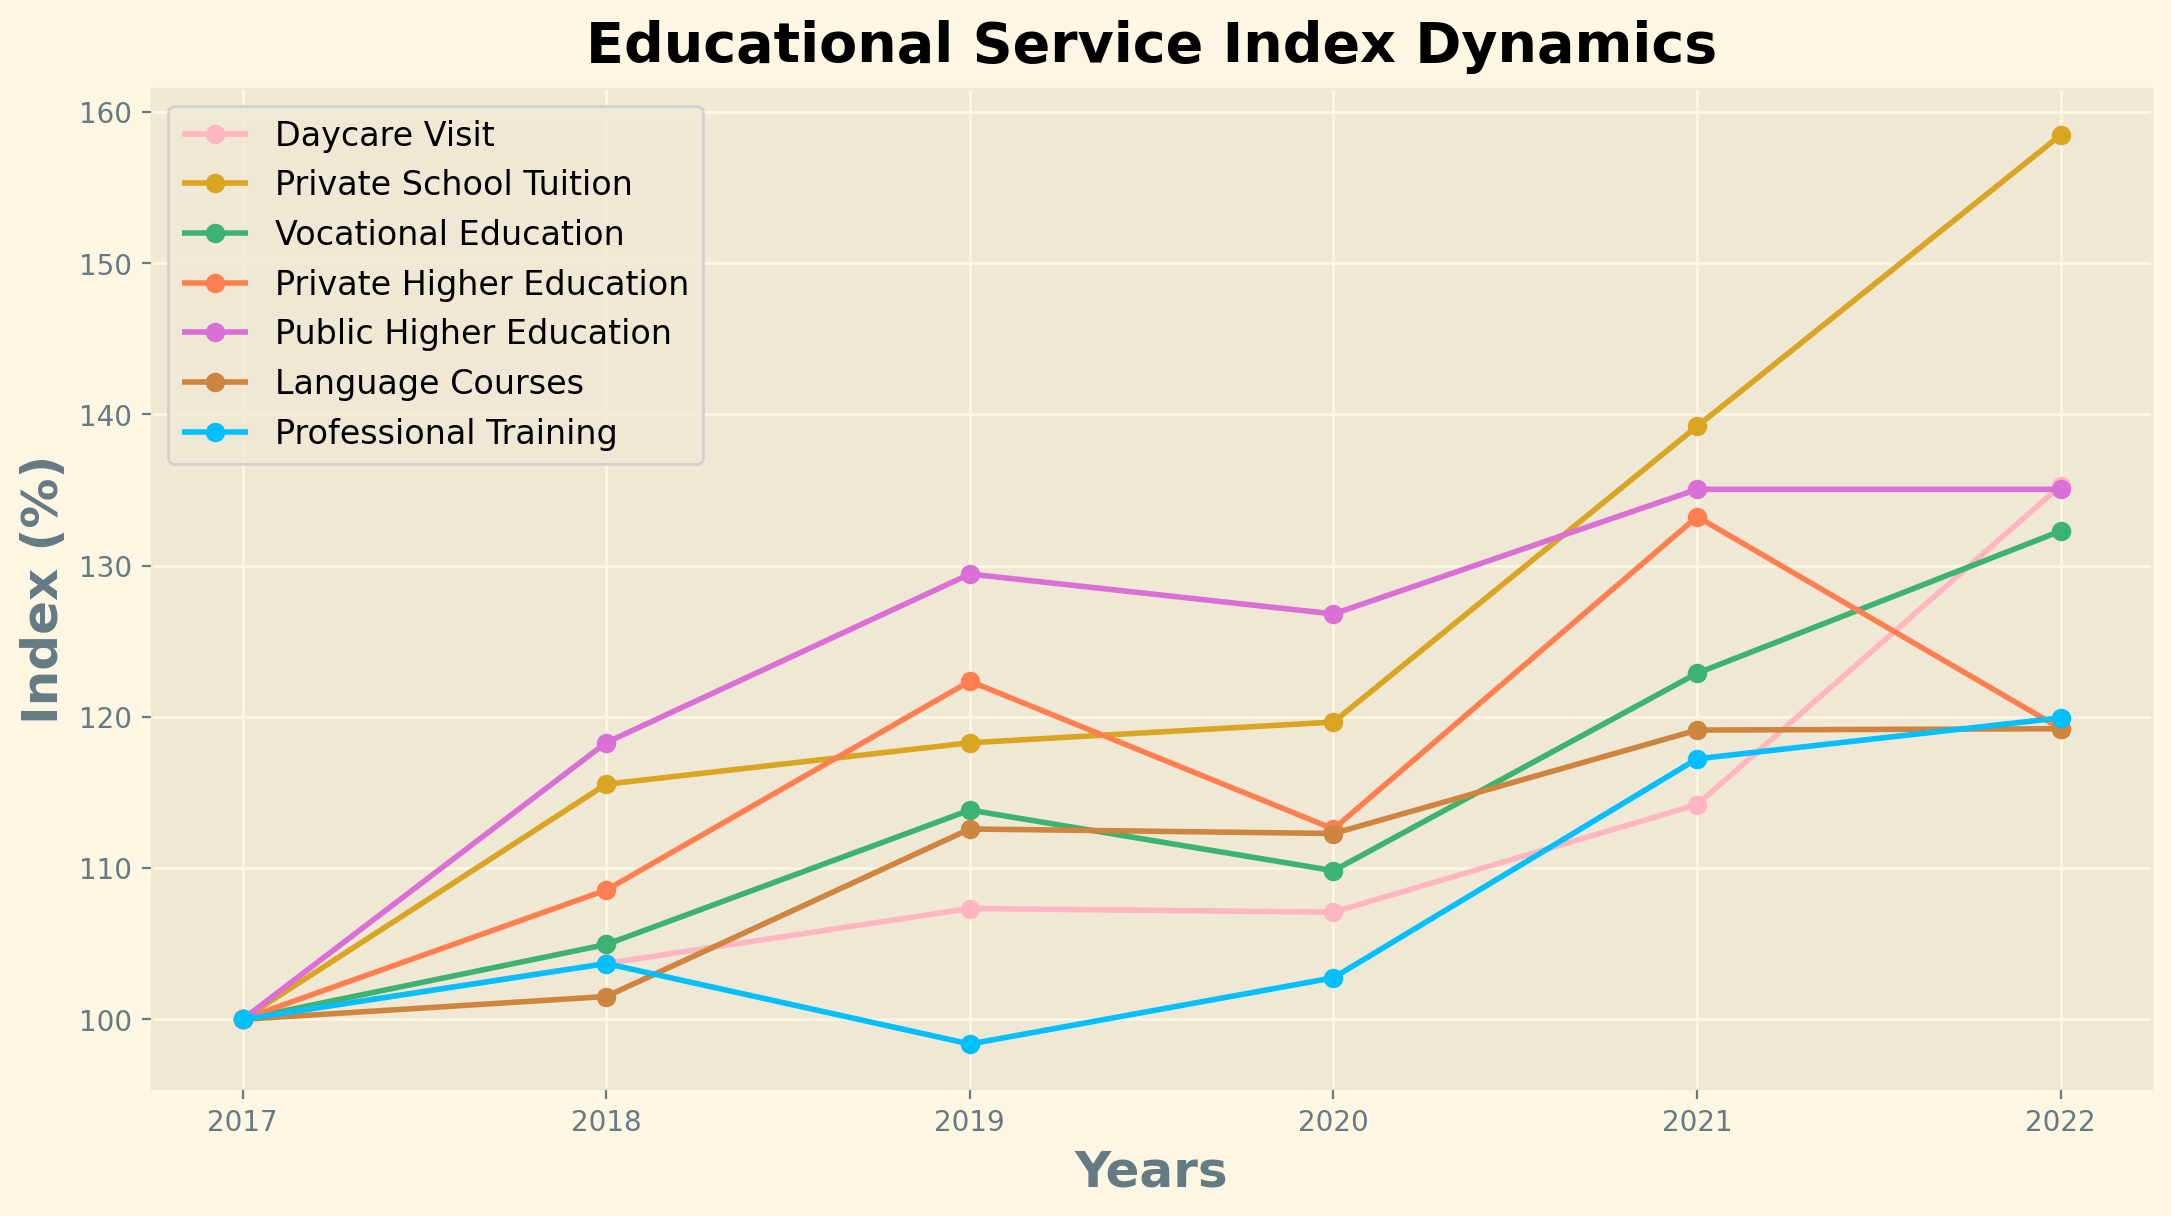

In [11]:
plt.style.use('Solarize_Light2')

fig = plt.figure(figsize=(10,5), dpi=200)
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(Edu_Service_index['Year'], Edu_Service_index['Daycare Visit (per day)'], marker='o', label='Daycare Visit', color='lightpink', linewidth=2)
ax.plot(Edu_Service_index['Year'], Edu_Service_index['Private School Tuition (per month)'], marker='o', label='Private School Tuition', color='goldenrod', linewidth=2)
ax.plot(Edu_Service_index['Year'], Edu_Service_index['Vocational Education (per semester)'], marker='o', label='Vocational Education', color='mediumseagreen', linewidth=2)
ax.plot(Edu_Service_index['Year'], Edu_Service_index['Private Higher Edu (per semester)'], marker='o', label='Private Higher Education', color='coral', linewidth=2)
ax.plot(Edu_Service_index['Year'], Edu_Service_index['Public Higher Edu (per semester)'], marker='o', label='Public Higher Education', color='orchid', linewidth=2)
ax.plot(Edu_Service_index['Year'], Edu_Service_index['Language Courses (per hour)'], marker='o', label='Language Courses', color='peru', linewidth=2)
ax.plot(Edu_Service_index['Year'], Edu_Service_index['Professional Training (per hour)'], marker='o', label='Professional Training', color='deepskyblue', linewidth=2)

plt.title('Educational Service Index Dynamics', fontsize=20, fontweight='bold', pad=10)

plt.xlabel('Years', fontsize=18, fontweight='bold')
plt.ylabel('Index (%)', fontsize=18, fontweight='bold')

plt.legend(fontsize=12);

<div style="
    background: linear-gradient(135deg, #f3f9fd, #e2f0f7);
    border-left: 5px solid #3498db;
    border-bottom: 5px solid #3498db;
    padding: 25px;
    border-radius: 10px;
    font-family: 'Inter', Arial, sans-serif;
    font-size: 18px;
    line-height: 1.7;
    color: #2c3e50;
    box-shadow: 2px 2px 12px rgba(0, 0, 0, 0.15);
    margin-top: 20px;">
    <strong style="font-size: 22px; color: #2980b9;">📊 Key Trends in Educational Service Index Dynamics:</strong>    
    <p style="margin-top: 20px;">The cost of educational services has shown significant changes over time, with private institutions experiencing the highest growth.</p>
    <ul style="margin-top: 15px; padding-left: 25px;">
        <li><strong style="color: #e74c3c;">Private School Tuition has increased the most:</strong> Reached nearly <strong>160%</strong> by 2022, reflecting a sharp rise in costs.</li>
        <li><strong style="color: #e74c3c;">Public Higher Education saw steady growth:</strong> Stabilized after 2021 at around <strong>140%</strong>.</li>
        <li><strong style="color: #f39c12;">Private Higher Education experienced fluctuations:</strong> Peaked in 2021 but declined in 2022.</li>
        <li><strong style="color: #27ae60;">Vocational Education and Professional Training grew steadily:</strong> Suggesting rising demand and costs for alternative education.</li>
        <li><strong style="color: #27ae60;">Daycare Visit costs remained relatively low:</strong> However, they saw a significant increase after 2020.</li>
    </ul>
    <p style="margin-top: 20px;">This trend underscores the increasing cost of education, with private institutions facing the highest price hikes.</p>

</div>


## <span style="color:transparent;">Loading Inflation Dataset to Calculate the Difference Between Index and Inflation</span>

<div style="
    background: linear-gradient(145deg, #aa6dc1, #bf87da);
    padding: 25px;
    text-align: center;
    color: #f8f8f8;
    position: relative;
    border-radius: 15px;
    box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
    filter: brightness(1.15);
    overflow: hidden;">
    <h2 style="font-family: 'Poppins', sans-serif; font-size: 28px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 4px rgba(255, 255, 255, 0.3);">
        Loading Inflation Dataset to Calculate the Difference Between Index and Inflation
    </h2>
</div>

In [12]:
inflation = pd.read_excel('/kaggle/input/russias-education-system-full-data/_F01_01_2017_T31_12_2024.xlsx')

In [13]:
inflation

,Дата,"Ключевая ставка, % годовых","Инфляция, % г/г",Цель по инфляции
0,12.2024,21.00,9.52,4
1,11.2024,21.00,8.88,4
2,10.2024,21.00,8.54,4
3,9.2024,19.00,8.63,4
4,8.2024,18.00,9.05,4
...,...,...,...,...
91,5.2017,9.25,4.10,4
92,4.2017,9.75,4.10,4
93,3.2017,9.75,4.30,4
94,2.2017,10.00,4.60,4


In [14]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Дата                        96 non-null     float64
 1   Ключевая ставка, % годовых  96 non-null     float64
 2   Инфляция, % г/г             96 non-null     float64
 3   Цель по инфляции            96 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 3.1 KB


In [15]:
inflation.columns = ['Date', 'Key Rate', 'Inflation', 'Inflation Target']

In [16]:
year_inflation = inflation[(inflation['Date'].astype(str).str.match(r'^12\.20\d\d$')) | (inflation['Date']==12.2020)]

In [17]:
year_inflation

,Date,Key Rate,Inflation,Inflation Target
0,12.2024,21.00,9.52,4
12,12.2023,16.00,7.42,4
24,12.2022,7.50,11.94,4
36,12.2021,8.50,8.39,4
48,12.2020,4.25,4.90,4
60,12.2019,6.25,3.00,4
72,12.2018,7.75,4.30,4
84,12.2017,7.75,2.50,4


In [18]:
year_inflation = year_inflation.sort_values('Date')

year_inflation['Date'] = year_inflation['Date'].astype(str).str[-4:]

In [19]:
year_inflation.reset_index(drop=True, inplace=True)
year_inflation = year_inflation.rename(columns={year_inflation.columns[0]: "Year"})

year_inflation

,Year,Key Rate,Inflation,Inflation Target
0,2017,7.75,2.50,4
1,2018,7.75,4.30,4
2,2019,6.25,3.00,4
3,.202,4.25,4.90,4
4,2021,8.50,8.39,4
5,2022,7.50,11.94,4
6,2023,16.00,7.42,4
7,2024,21.00,9.52,4


In [20]:
year_inflation['Year'] = year_inflation['Year'].replace({'.202': '2020'})
year_inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              8 non-null      object 
 1   Key Rate          8 non-null      float64
 2   Inflation         8 non-null      float64
 3   Inflation Target  8 non-null      int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 384.0+ bytes


In [21]:
year_inflation = year_inflation.copy()
year_inflation = year_inflation[['Year', 'Inflation']]
year_inflation

,Year,Inflation
0,2017,2.50
1,2018,4.30
2,2019,3.00
3,2020,4.90
4,2021,8.39
5,2022,11.94
6,2023,7.42
7,2024,9.52


In [22]:
inflation_cumulative_to24 = (1 + year_inflation['Inflation'] / 100).prod() - 1

print(f"Cumulative inflation from 2017 to 2024: {inflation_cumulative_to24 * 100:.2f}%")

Cumulative inflation from 2017 to 2024: 64.88%


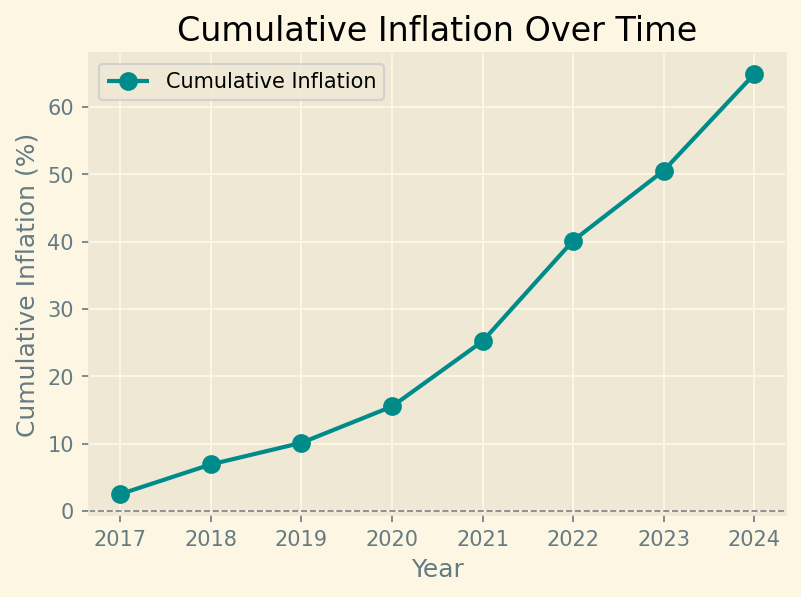

In [23]:
year_inflation['Cumulative'] = (1 + year_inflation['Inflation'] / 100).cumprod() - 1

plt.figure(figsize=(6,4), dpi=150)
plt.plot(year_inflation['Year'], year_inflation['Cumulative'] * 100, color='darkcyan', marker='o', markersize=8, label='Cumulative Inflation')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) 
plt.title('Cumulative Inflation Over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative Inflation (%)')
plt.legend();

<div style="
    background: linear-gradient(135deg, #f3f9fd, #e2f0f7);
    border-left: 5px solid #3498db;
    border-bottom: 5px solid #3498db;
    padding: 25px;
    border-radius: 10px;
    font-family: 'Inter', Arial, sans-serif;
    font-size: 18px;
    line-height: 1.7;
    color: #2c3e50;
    box-shadow: 2px 2px 12px rgba(0, 0, 0, 0.15);
    margin-top: 20px;">
    <strong style="font-size: 22px; color: #2980b9;">📊 Conclusions on Inflation Trends (2017–2024):</strong>    
    <p style="margin-top: 20px;">From 2017 to 2024, inflation trends show a rapid acceleration, particularly after 2021.</p>
    <ul style="margin-top: 15px; padding-left: 25px;">
        <li><strong style="color: #e74c3c;">Inflation is accelerating:</strong> Cumulative inflation has been growing faster, with a sharp increase observed after 2021.</li>
        <li><strong style="color: #e74c3c;">Sharp increase after 2021:</strong> Likely due to economic crises, external sanctions, changes in monetary policy, or other macroeconomic factors.</li>
        <li><strong style="color: #e74c3c;">Reaching 60% in 2024:</strong> This indicates a significant devaluation of money over the period.</li>
        <li><strong style="color: #e74c3c;">Possible consequences:</strong> Reduced purchasing power, rising costs of goods and services, and the need for salary and pension adjustments.</li>
    </ul>

</div>


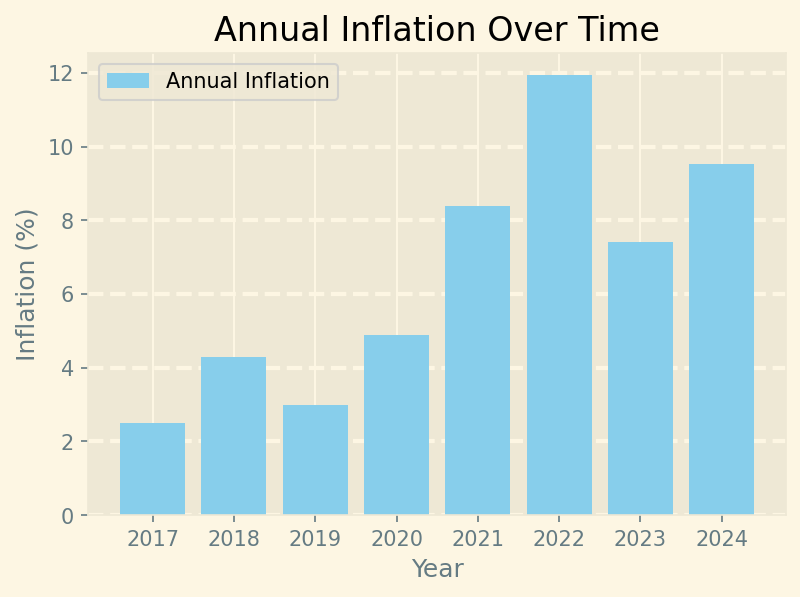

In [24]:
# Построение графика
plt.figure(figsize=(6,4), dpi=150)
plt.bar(year_inflation['Year'], year_inflation['Inflation'], color='skyblue', label='Annual Inflation')
plt.title('Annual Inflation Over Time')
plt.xlabel('Year')
plt.ylabel('Inflation (%)')
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=2);

<div style="
    background: linear-gradient(135deg, #f3f9fd, #e2f0f7);
    border-left: 5px solid #3498db;
    border-bottom: 5px solid #3498db;
    padding: 25px;
    border-radius: 10px;
    font-family: 'Inter', Arial, sans-serif;
    font-size: 18px;
    line-height: 1.7;
    color: #2c3e50;
    box-shadow: 2px 2px 12px rgba(0, 0, 0, 0.15);
    margin-top: 20px;">
    <strong style="font-size: 22px; color: #2980b9;">📊 Insights on Annual Inflation:</strong>    
    <p style="margin-top: 20px;">From 2020 to 2024, inflation trends have fluctuated, showing periods of both acceleration and decline.</p>
    <ul style="margin-top: 15px; padding-left: 25px;">
        <li><strong style="color: #e74c3c;">Peak inflation in 2022:</strong> Exceeding <strong>12%</strong>, likely due to macroeconomic shocks (crisis, sanctions, currency fluctuations, etc.).</li>
        <li><strong style="color: #e74c3c;">Inflation acceleration from 2020:</strong> A significant upward trend.</li>
        <li><strong style="color: #27ae60;">Slight decline in 2023:</strong> After the peak in 2022, but still remains high.</li>
        <li><strong style="color: #e74c3c;">Increase again in 2024:</strong> Indicating ongoing instability or new factors driving prices up.</li>
    </ul>
    <p style="margin-top: 20px;">This chart explains why cumulative inflation (from the previous graph) is growing exponentially—each year adds high inflation percentages.</p>

</div>


## <span style="color:transparent;">Merging data to analyze education costs adjusted for inflation</span>

<div style="
    background: linear-gradient(145deg, #aa6dc1, #bf87da);
    padding: 25px;
    text-align: center;
    color: #f8f8f8;
    position: relative;
    border-radius: 15px;
    box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
    filter: brightness(1.15);
    overflow: hidden;">
    <h2 style="font-family: 'Poppins', sans-serif; font-size: 28px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 4px rgba(255, 255, 255, 0.3);">
        Merging data to analyze education costs adjusted for inflation
    </h2>
</div>

In [25]:
df = pd.merge(year_inflation, Edu_Service_index, how='inner', on='Year')

In [26]:
df

,Year,Inflation,Cumulative,Daycare Visit (per day),Private School Tuition (per month),Vocational Education (per semester),Private Higher Edu (per semester),Public Higher Edu (per semester),Language Courses (per hour),Professional Training (per hour)
0,2017,2.50,0.025000,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,2018,4.30,0.069075,103.7,115.55,104.95,108.55,118.3,101.51,103.69
2,2019,3.00,0.101147,107.33,118.29,113.84,122.36,129.45,112.59,98.37
3,2020,4.90,0.155103,107.09,119.66,109.83,112.59,126.81,112.29,102.75
4,2021,8.39,0.252017,114.2,139.22,122.89,133.24,135.05,119.13,117.23
5,2022,11.94,0.401507,135.3,158.49,132.3,119.23,135.05,119.22,119.94


In [27]:
inflation_cumulative_to22 = (1 + df['Inflation'] / 100).prod() - 1

print(f"Cumulative inflation from 2017 to 2022: {inflation_cumulative_to22 * 100:.2f}%")

Cumulative inflation from 2017 to 2022: 40.15%


In [28]:
columns_to_calculate = [
    'Daycare Visit (per day)', 'Private School Tuition (per month)', 
    'Vocational Education (per semester)', 'Private Higher Edu (per semester)', 
    'Public Higher Edu (per semester)', 'Language Courses (per hour)', 
    'Professional Training (per hour)'
]

for column in columns_to_calculate:
    price_change_relative = [100] 
    
    for i in range(1, len(df)):
        price_change = ((df[column].iloc[i] / df[column].iloc[i-1]) * 100) - df['Inflation'].iloc[i]
        price_change_relative.append(round(price_change, 2))
    
    short_column_name = column.split('(')[0].strip() 
    df[f'Rel Change {short_column_name}'] = price_change_relative

df

,Year,Inflation,Cumulative,Daycare Visit (per day),Private School Tuition (per month),Vocational Education (per semester),Private Higher Edu (per semester),Public Higher Edu (per semester),Language Courses (per hour),Professional Training (per hour),Rel Change Daycare Visit,Rel Change Private School Tuition,Rel Change Vocational Education,Rel Change Private Higher Edu,Rel Change Public Higher Edu,Rel Change Language Courses,Rel Change Professional Training
0,2017,2.50,0.025000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.00,100.00,100.00,100.00,100.00,100.00
1,2018,4.30,0.069075,103.7,115.55,104.95,108.55,118.3,101.51,103.69,99.40,111.25,100.65,104.25,114.00,97.21,99.39
2,2019,3.00,0.101147,107.33,118.29,113.84,122.36,129.45,112.59,98.37,100.50,99.37,105.47,109.72,106.43,107.92,91.87
3,2020,4.90,0.155103,107.09,119.66,109.83,112.59,126.81,112.29,102.75,94.88,96.26,91.58,87.12,93.06,94.83,99.55
4,2021,8.39,0.252017,114.2,139.22,122.89,133.24,135.05,119.13,117.23,98.25,107.96,103.50,109.95,98.11,97.70,105.70
5,2022,11.94,0.401507,135.3,158.49,132.3,119.23,135.05,119.22,119.94,106.54,101.90,95.72,77.55,88.06,88.14,90.37


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 6 non-null      object 
 1   Inflation                            6 non-null      float64
 2   Cumulative                           6 non-null      float64
 3   Daycare Visit (per day)              6 non-null      object 
 4   Private School Tuition (per month)   6 non-null      object 
 5   Vocational Education (per semester)  6 non-null      object 
 6   Private Higher Edu (per semester)    6 non-null      object 
 7   Public Higher Edu (per semester)     6 non-null      object 
 8   Language Courses (per hour)          6 non-null      object 
 9   Professional Training (per hour)     6 non-null      object 
 10  Rel Change Daycare Visit             6 non-null      float64
 11  Rel Change Private School Tuition   

In [30]:
columns_to_calculate_2 = ['Rel Change Daycare Visit', 'Rel Change Private School Tuition', 'Rel Change Vocational Education',
                          'Rel Change Private Higher Edu', 'Rel Change Public Higher Edu', 'Rel Change Language Courses', 
                          'Rel Change Professional Training']
sum_perc = 0
for col in columns_to_calculate_2:
    service_name = ' '.join(col.split()[2:])  
    percent = round(df[col].iloc[-1] - df[col].iloc[0], 2)
    sum_perc += percent  
    print(f'From 2017 to 2022, the real price change for the service "{service_name}" was {percent}%')

average_percent = round(sum_perc / len(columns_to_calculate_2), 2)
print(f'The average price change considering inflation over the period from 2017 to 2022 was {average_percent}%.')

From 2017 to 2022, the real price change for the service "Daycare Visit" was 6.54%
From 2017 to 2022, the real price change for the service "Private School Tuition" was 1.9%
From 2017 to 2022, the real price change for the service "Vocational Education" was -4.28%
From 2017 to 2022, the real price change for the service "Private Higher Edu" was -22.45%
From 2017 to 2022, the real price change for the service "Public Higher Edu" was -11.94%
From 2017 to 2022, the real price change for the service "Language Courses" was -11.86%
From 2017 to 2022, the real price change for the service "Professional Training" was -9.63%
The average price change considering inflation over the period from 2017 to 2022 was -7.39%.


In [31]:
sum_perc = 0
for col in columns_to_calculate:
    service_name = ' '.join(col.split()[:-2]) 
    percent = round(df[col].iloc[-1] - df[col].iloc[0], 2)
    sum_perc += percent  
    print(f'From 2017 to 2022, the price index change for the service "{service_name}" is {percent}%')

average_percent = round(sum_perc / len(columns_to_calculate), 2)
print(f'The average price change considering inflation over the period from 2017 to 2022 was {average_percent}%.')

From 2017 to 2022, the price index change for the service "Daycare Visit" is 35.3%
From 2017 to 2022, the price index change for the service "Private School Tuition" is 58.49%
From 2017 to 2022, the price index change for the service "Vocational Education" is 32.3%
From 2017 to 2022, the price index change for the service "Private Higher Edu" is 19.23%
From 2017 to 2022, the price index change for the service "Public Higher Edu" is 35.05%
From 2017 to 2022, the price index change for the service "Language Courses" is 19.22%
From 2017 to 2022, the price index change for the service "Professional Training" is 19.94%
The average price change considering inflation over the period from 2017 to 2022 was 31.36%.


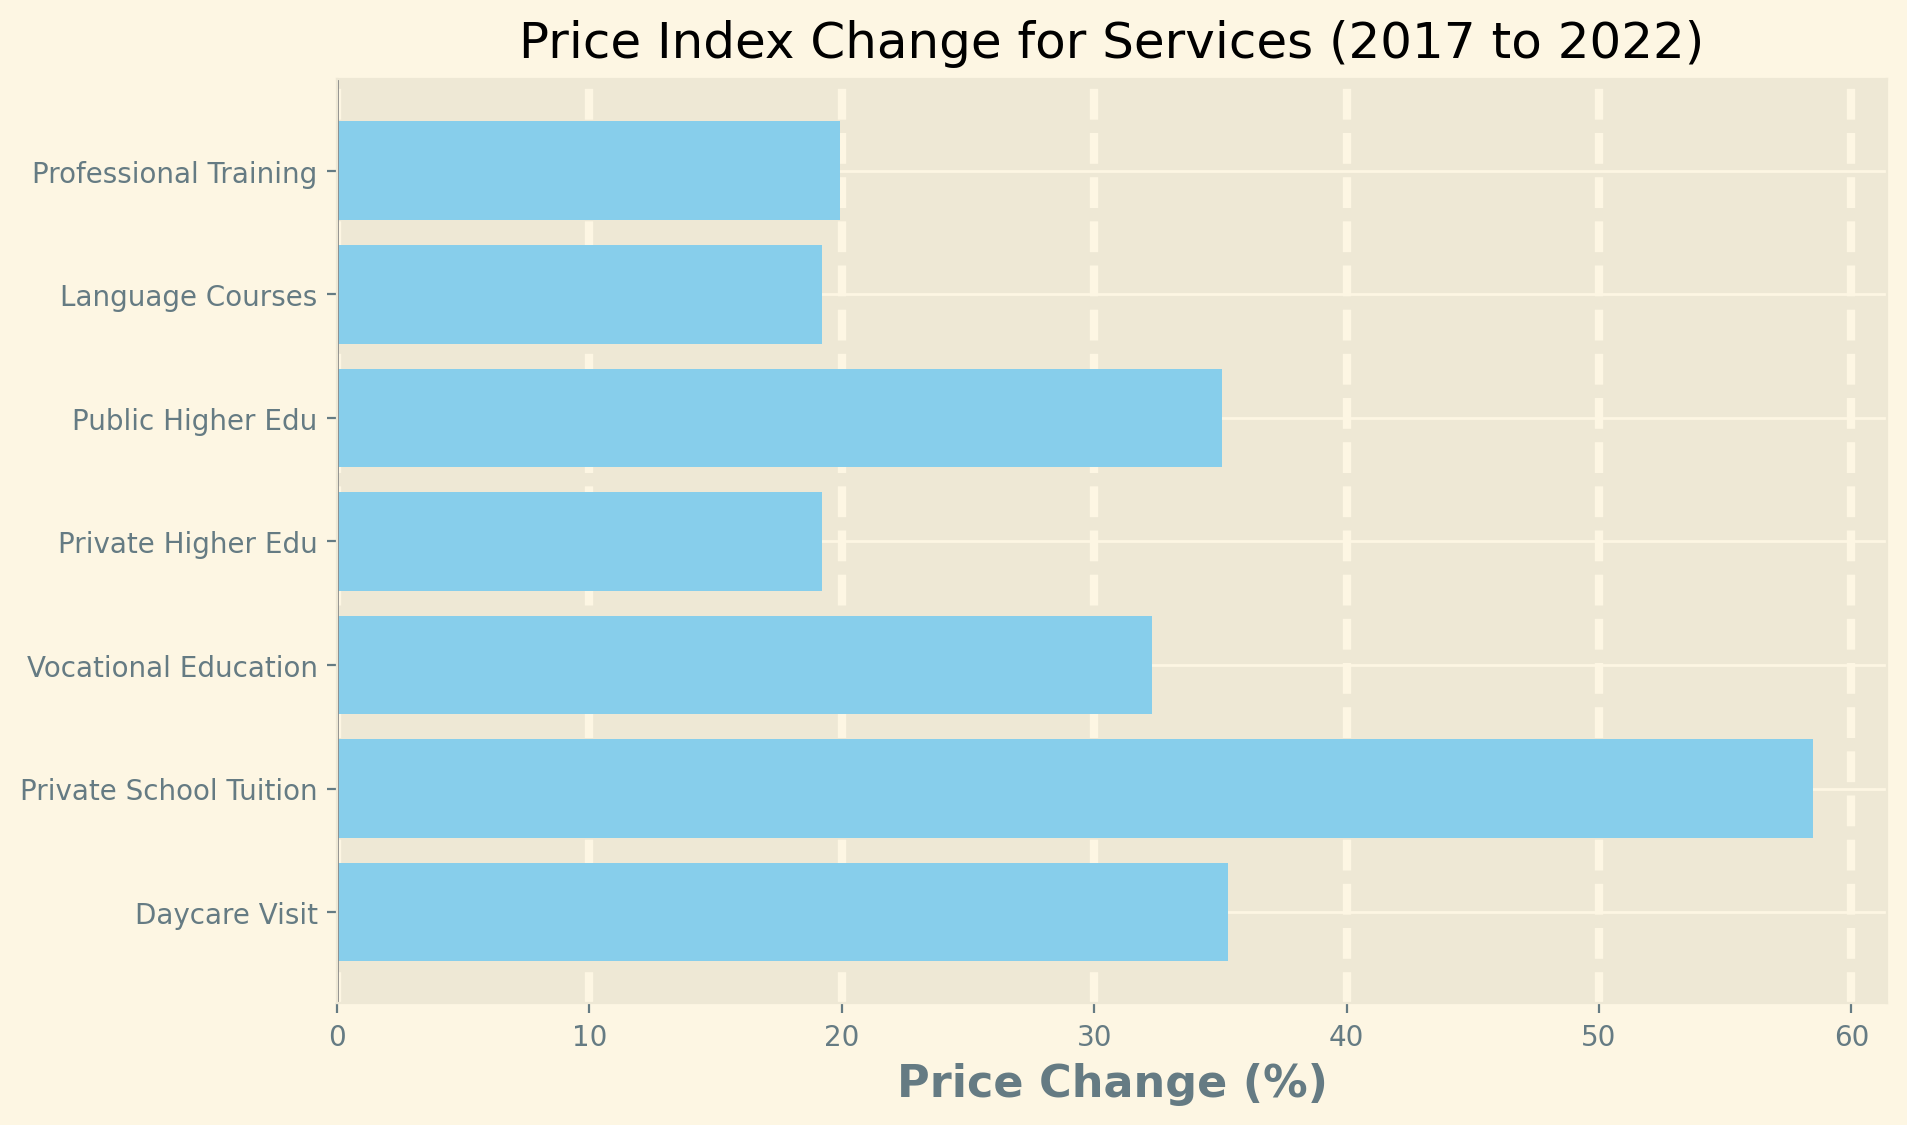

In [32]:
services = [
    "Daycare Visit", "Private School Tuition", "Vocational Education",
    "Private Higher Edu", "Public Higher Edu", "Language Courses", 
    "Professional Training"
]
price_changes = [35.3, 58.49, 32.3, 19.23, 35.05, 19.22, 19.94]

plt.figure(figsize=(10, 6), dpi=200)
plt.barh(services, price_changes, color='skyblue')
plt.xlabel('Price Change (%)', fontsize=16, fontweight='bold')
plt.title('Price Index Change for Services (2017 to 2022)', fontsize=18, pad=8)
plt.axvline(0, color='grey', linewidth=1)
plt.grid(axis='x', linestyle='--', linewidth=3);

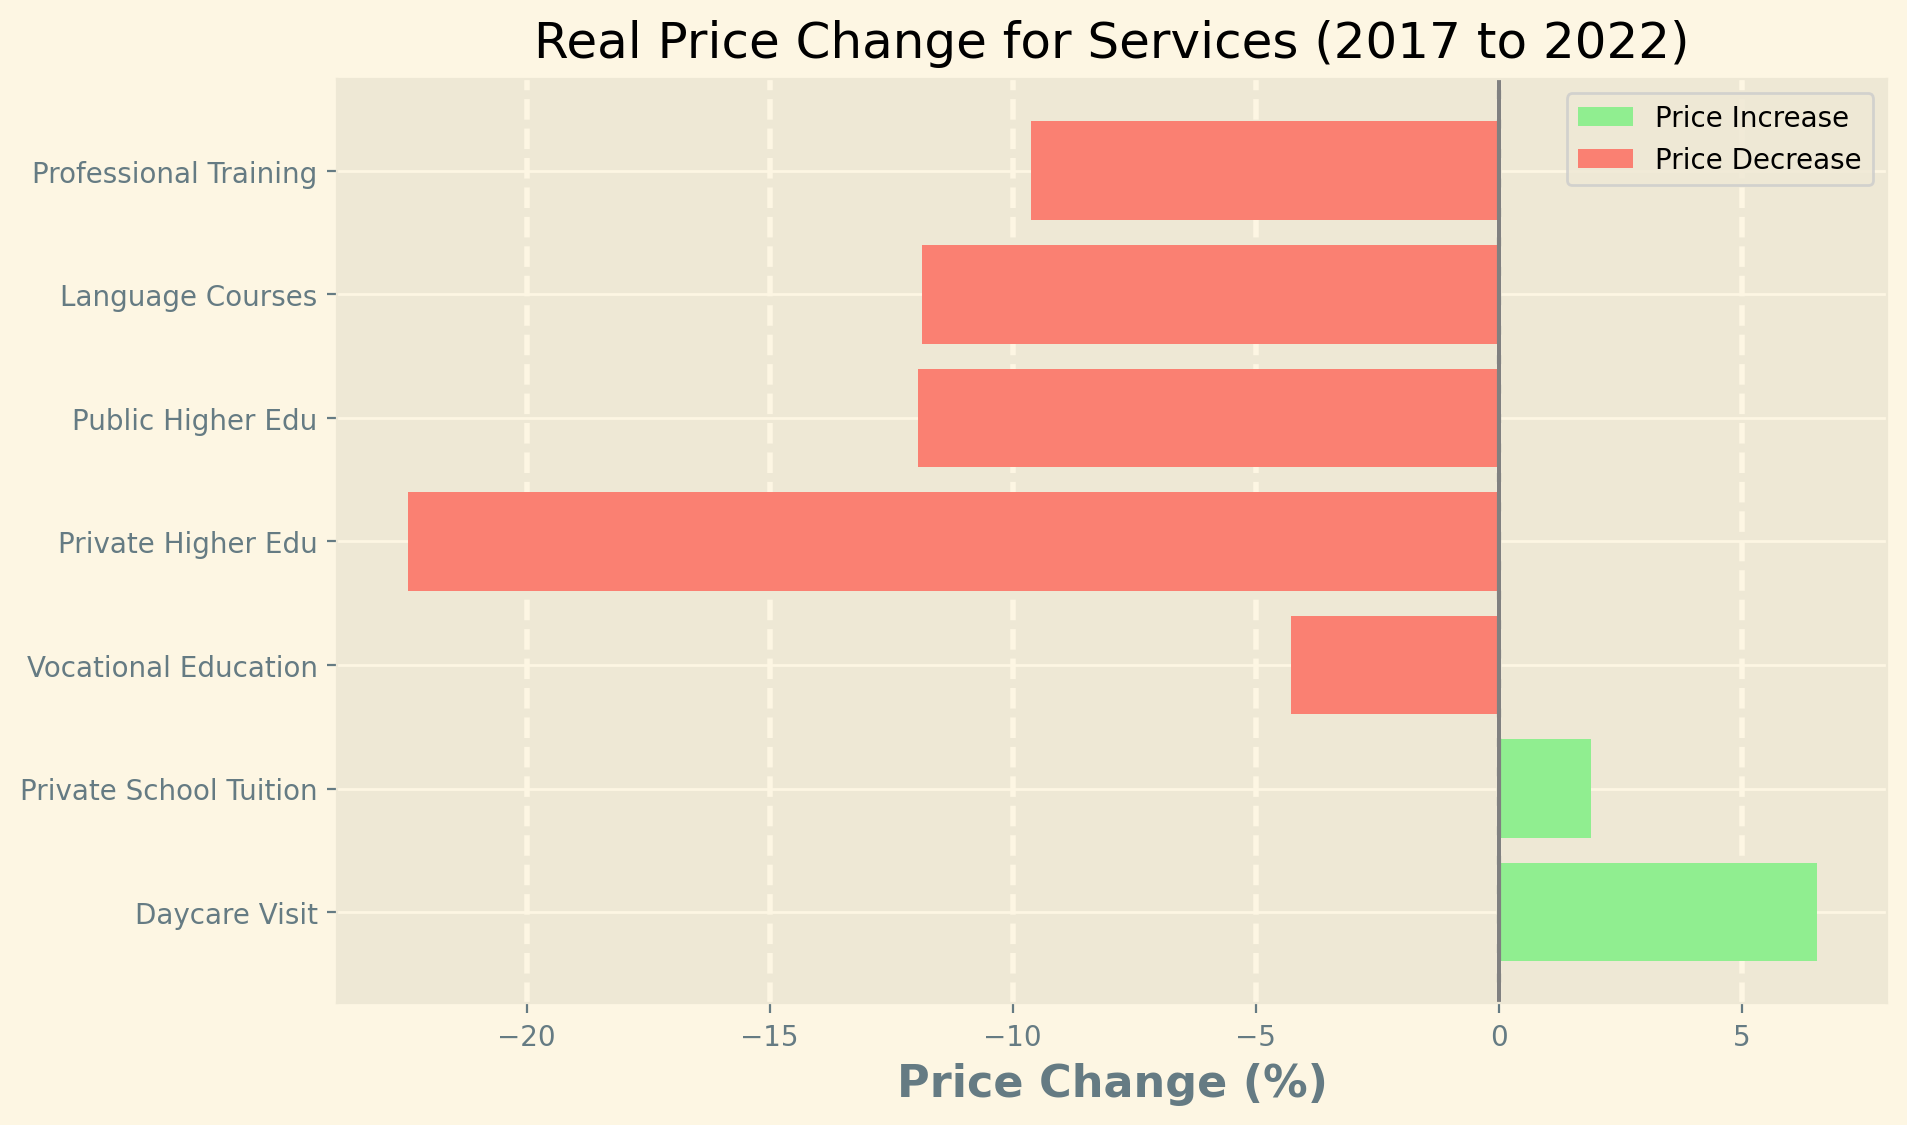

In [33]:
services = [
    "Daycare Visit", "Private School Tuition", "Vocational Education",
    "Private Higher Edu", "Public Higher Edu", "Language Courses", 
    "Professional Training"
]
price_changes = [6.54, 1.9, -4.28, -22.45, -11.94, -11.86, -9.63]

positive_changes = [change if change > 0 else 0 for change in price_changes]
negative_changes = [change if change < 0 else 0 for change in price_changes]

plt.figure(figsize=(10, 6), dpi=200)
plt.barh(services, positive_changes, color='lightgreen', label='Price Increase')
plt.barh(services, negative_changes, color='salmon', label='Price Decrease')
plt.xlabel('Price Change (%)', fontsize=16, fontweight='bold')
plt.title('Real Price Change for Services (2017 to 2022)', fontsize=18, pad=8)
plt.axvline(0, color='grey', linewidth=1.5)
plt.legend()
plt.grid(axis='x', linestyle='--', linewidth=2);

<div style="
    background: linear-gradient(135deg, #f3f9fd, #e2f0f7);
    border-left: 5px solid #3498db;
    border-bottom: 5px solid #3498db;
    padding: 25px;
    border-radius: 10px;
    font-family: 'Inter', Arial, sans-serif;
    font-size: 18px;
    line-height: 1.7;
    color: #2c3e50;
    box-shadow: 2px 2px 12px rgba(0, 0, 0, 0.15);
    margin-top: 20px;">
    <strong style="font-size: 22px; color: #2980b9;">📊 Price Changes Adjusted for Inflation (2017–2022):</strong>    
    <p style="margin-top: 20px;">From 2017 to 2022, the real price change for various services, adjusted for inflation, presents a mixed picture of both increases and decreases.</p>
    <ul style="margin-top: 15px; padding-left: 25px;">
        <li><strong style="color: #e74c3c;">Daycare Visit:</strong> Increased by <strong>6.54%</strong>, indicating a higher real cost.</li>
        <li><strong style="color: #e74c3c;">Private School Tuition:</strong> Rose by <strong>1.9%</strong>, reflecting a modest real price increase.</li>
        <li><strong style="color: #27ae60;">Vocational Education:</strong> Dropped by <strong>-4.28%</strong>, showing a real price decrease.</li>
        <li><strong style="color: #27ae60;">Private Higher Education:</strong> Fell significantly by <strong>-22.45%</strong>, signaling a notable price reduction.</li>
        <li><strong style="color: #27ae60;">Public Higher Education:</strong> Decreased by <strong>-11.94%</strong>, indicating lower real prices for this service.</li>
        <li><strong style="color: #27ae60;">Language Courses:</strong> Saw a <strong>-11.86%</strong> decrease, suggesting they became more affordable.</li>
        <li><strong style="color: #27ae60;">Professional Training:</strong> Experienced a real price drop of <strong>-9.63%</strong>, continuing the downward trend.</li>
    </ul>
    <p style="margin-top: 20px;">In summary, while some services have become more expensive, many others—particularly in the education sector—have become cheaper when considering the inflationary effect.</p>
    <p style="margin-top: 20px; font-weight: bold; font-size: 18px;">🔍 Important Clarification:</p>
    <p>However, it's crucial to recognize that the raw price index—such as <strong>Private School Tuition</strong> rising by <strong>58.49%</strong>, or an average price increase of <strong>31.36%</strong>—does not fully reflect the real changes in prices over time.</p>
    <p style="margin-top: 20px;">When we account for inflation, the picture shifts dramatically. Services like <strong>Private Higher Education</strong>, <strong>Public Higher Education</strong>, <strong>Language Courses</strong>, and <strong>Professional Training</strong> have actually experienced a decrease in real prices. The average real price change for education services from 2017 to 2022 is <strong>-7.39%</strong>.</p>
    <p style="margin-top: 20px;">Thus, while nominal price increases may seem significant, the actual inflation-adjusted price changes demonstrate a reduction in the cost of education-related services. This highlights the importance of considering inflation when evaluating long-term price trends.</p>
</div>


# <span style="color:transparent;">Analysis of Higher Education by Areas of Study</span>

<div style="
    background: linear-gradient(145deg, #4a6075, #5b728b);
    padding: 30px;
    text-align: center;
    color: #f8f8f8;
    position: relative;
    border-radius: 20px;
    box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
    filter: brightness(1.15);
    overflow: hidden;">
    <h1 style="font-family: 'Poppins', sans-serif; font-size: 34px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 4px rgba(255, 255, 255, 0.3);">
        Analysis of Higher Education by Areas of Study
    </h1>
</div>

In [34]:
Graduates_HigherEdu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Field of Study  55 non-null     object 
 1   2017            55 non-null     float64
 2   2018            55 non-null     float64
 3   2019            55 non-null     float64
 4   2020            55 non-null     float64
 5   2021            55 non-null     float64
 6   2022            55 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.1+ KB


In [35]:
Graduates_HigherEdu.sample(3)

,Field of Study,2017,2018,2019,2020,2021,2022
0,Mathematics and Mechanics,7.9,7.9,7.9,8.1,7.9,8.9
15,Weapons and Systems,0.4,0.4,0.4,0.4,0.5,0.5
54,Total Graduates,969.5,933.2,908.7,849.4,813.3,816.3


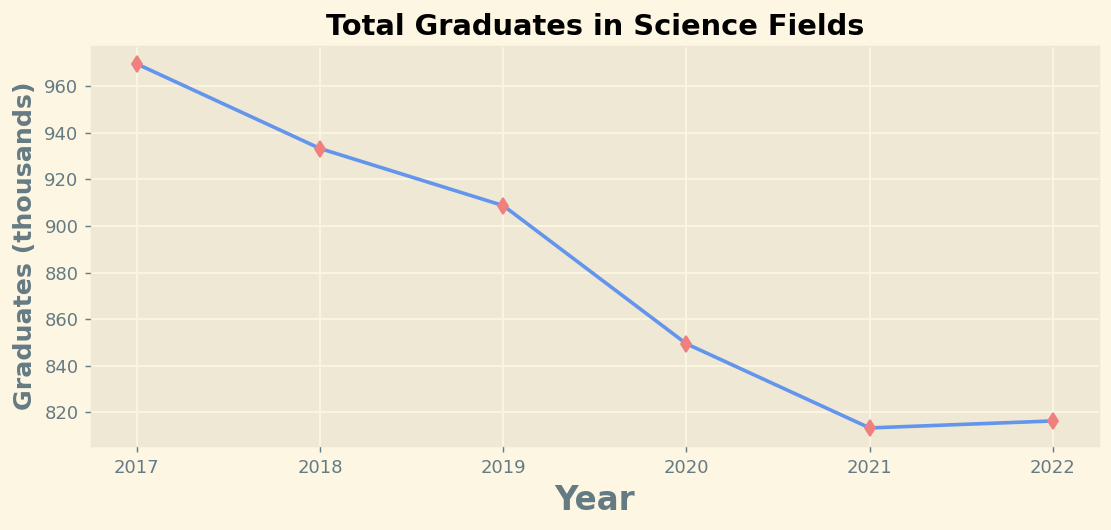

In [36]:
general_val = Graduates_HigherEdu.iloc[54, 1:].values 
general_col = Graduates_HigherEdu.iloc[54, 1:].index
fig = plt.figure(figsize=(10,4), dpi=130)
plt.plot(general_col, general_val, color='cornflowerblue', marker='d', markeredgecolor='lightcoral', markerfacecolor='lightcoral')  
plt.xlabel("Year", fontsize=18, fontweight='bold')
plt.ylabel("Graduates (thousands)", fontsize=14, fontweight='bold')  
plt.title("Total Graduates in Science Fields", fontweight='bold');

<div style="
    background: linear-gradient(135deg, #eafaf1, #d4f5e1); 
    border-left: 5px solid #58d68d; 
    border-bottom: 5px solid #58d68d;
    padding: 20px; 
    border-radius: 8px; 
    font-family: 'Inter', Arial, sans-serif;
    font-size: 16px;
    line-height: 1.6;
    box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);
    color: #2c3e50;">
    <strong style="font-size: 20px;">📉 Conclusions:</strong>    
    <ul style="margin-top: 15px; padding-left: 20px;">
        <li><strong>Overall decline in the number of graduates</strong> – from 2017 to 2021, there is a steady decrease in the number of graduates in science fields.</li>
        <li><strong>Sharp drop in 2020</strong> – possibly linked to the COVID-19 pandemic, changes in the education system, or economic factors.</li>
        <li><strong>Stabilization in 2021-2022</strong> – after the steep decline in 2020, the number of graduates slowed its decline and even showed a slight increase in 2022.</li>
        <li><strong>Possible reasons for the decline</strong> – could be due to decreasing interest in science, demographic shifts, challenges in education, or a drop in student enrollment.</li>
    </ul>

</div>


In [37]:
Graduates_HigherEdu["Mean"] = Graduates_HigherEdu.iloc[:, 1:].mean(axis=1).round(1)

In [38]:
Graduates_HigherEdu[['Field of Study', 'Mean']].nlargest(6, ['Mean'])[1:]

,Field of Study,Mean
37,Economics,211.8
39,Law,112.8
43,Education and Pedagogical Sciences,88.7
30,Clinical Medicine,34.1
8,Informatics,32.1


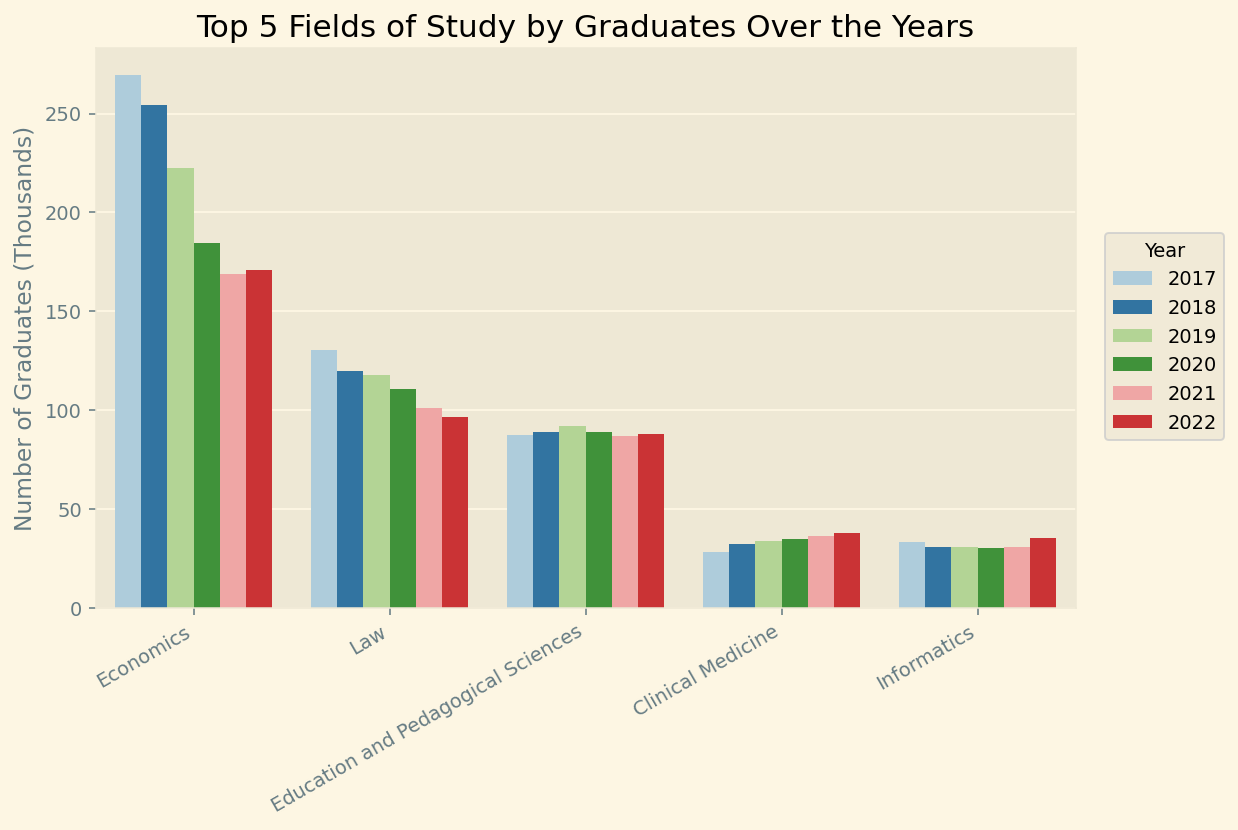

In [39]:
top_5 = Graduates_HigherEdu.iloc[[37,39,43,30, 8], :-1] 
top_5_melted = top_5.melt(id_vars="Field of Study", var_name="Year", value_name="Graduates")

fig = plt.figure(figsize=(7, 4), dpi=140)
ax = fig.add_axes([0,0,1,1])
sns.barplot(x="Field of Study", y="Graduates", hue="Year", data=top_5_melted, palette="Paired")

plt.xticks(rotation=30, ha="right") 
plt.ylabel("Number of Graduates (Thousands)")
plt.xlabel("")
plt.title("Top 5 Fields of Study by Graduates Over the Years")
ax.legend(title="Year", loc=(1.03,0.3));

<div style="
    background: linear-gradient(135deg, #eafaf1, #d4f5e1); 
    border-left: 5px solid #58d68d; 
    border-bottom: 5px solid #58d68d;
    padding: 20px; 
    border-radius: 8px; 
    font-family: 'Inter', Arial, sans-serif;
    font-size: 16px;
    line-height: 1.6;
    box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);
    color: #2c3e50;">
    <strong style="font-size: 20px;">📉 Conclusions:</strong>    
    <ul style="margin-top: 15px; padding-left: 20px;">
        <li><strong>Decline in economics graduates</strong> – there is a sharp decline in the number of graduates in the field of economics from 2017 to 2022.</li>
        <li><strong>Stability in educational and medical sciences</strong> – the number of graduates in "Education and Pedagogical Sciences" and "Clinical Medicine" remains relatively stable.</li>
        <li><strong>Decreasing interest in law education</strong> – the number of law graduates has also declined over the given period.</li>
        <li><strong>Growth in informatics graduates</strong> – a small but noticeable increase in the number of graduates in informatics by 2022.</li>
    </ul>

</div>


In [40]:
Graduates_HigherEdu[['Field of Study', 'Mean']].nsmallest(5, ['Mean'])

,Field of Study,Mean
15,Weapons and Systems,0.4
29,Basic Medicine,0.4
27,Nanotechnologies,0.7
33,Nursing,1.0
46,Philosophy and Religion,1.1


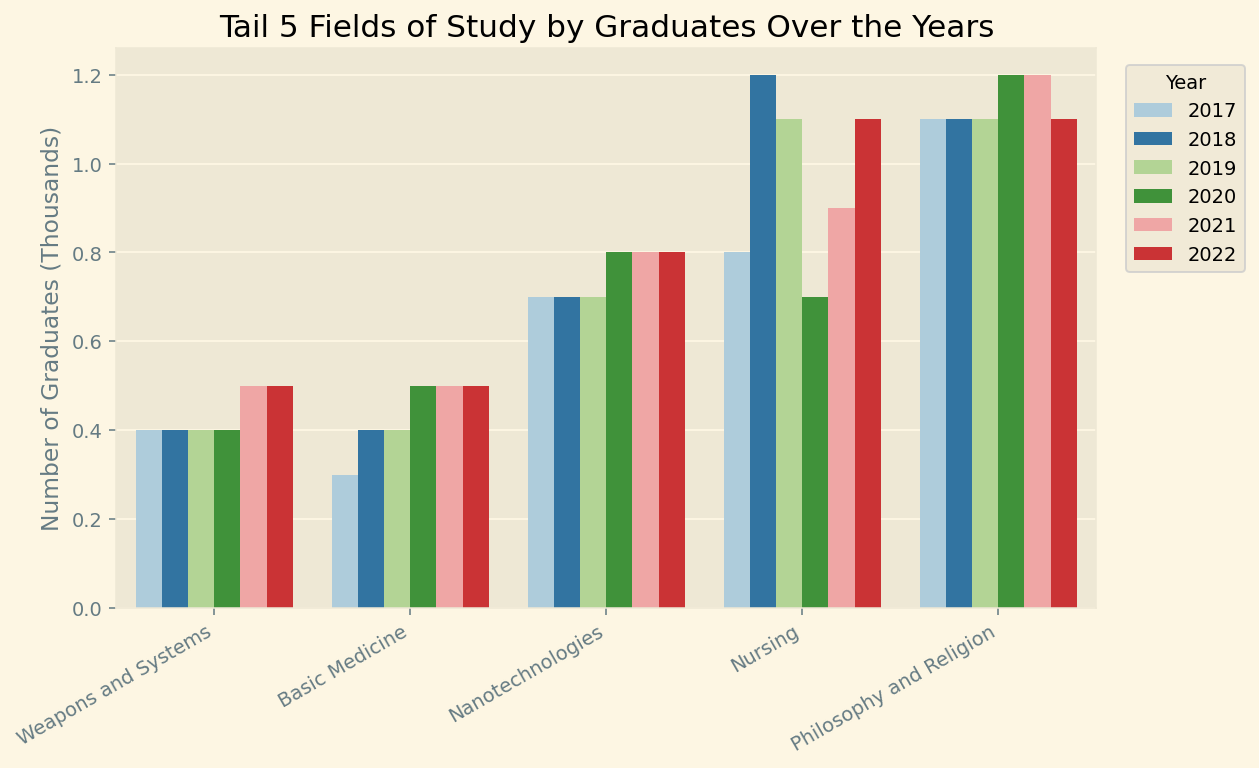

In [41]:
tail_5 = Graduates_HigherEdu.iloc[[15,29,27,33, 46], :-1] 
tail_5_melted = tail_5.melt(id_vars="Field of Study", var_name="Year", value_name="Graduates")

fig = plt.figure(figsize=(7, 4), dpi=140)
ax = fig.add_axes([0,0,1,1])
sns.barplot(x="Field of Study", y="Graduates", hue="Year", data=tail_5_melted, palette="Paired")

plt.xticks(rotation=30, ha="right") 
plt.ylabel("Number of Graduates (Thousands)")
plt.xlabel("")
plt.title("Tail 5 Fields of Study by Graduates Over the Years")
ax.legend(title="Year", loc=(1.03,0.6));

<div style="
    background: linear-gradient(135deg, #eafaf1, #d4f5e1); 
    border-left: 5px solid #58d68d; 
    border-bottom: 5px solid #58d68d;
    padding: 20px; 
    border-radius: 8px; 
    font-family: 'Inter', Arial, sans-serif;
    font-size: 16px;
    line-height: 1.6;
    box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);
    color: #2c3e50;">
    <strong style="font-size: 20px;">📊 Conclusions:</strong>    
    <ul style="margin-top: 15px; padding-left: 20px;">
        <li><strong>These fields remain the least popular</strong> – these areas continue to be the least chosen by graduates, likely due to their niche nature or limited job demand.</li>
        <li><strong>Increase in interest in "Basic Medicine" and "Nanotechnologies"</strong> – the number of graduates in these fields has grown over the period.</li>
        <li><strong>Fluctuations in "Nursing"</strong> – a notable drop in graduates in 2020, followed by growth in 2021–2022.</li>
        <li><strong>Stability in "Weapons and Systems"</strong> – the number of graduates remains roughly the same over time.</li>
        <li><strong>"Philosophy and Religion" has the highest numbers among the least popular fields</strong> – despite being in the bottom five, it consistently has the most graduates.</li>
    </ul>

</div>


## <span style="color:transparent;">Analysis of Graduate Variability and Field Popularity (Top vs. Least Popular Professions)</span>

<div style="
    background: linear-gradient(145deg, #aa6dc1, #bf87da);
    padding: 25px;
    text-align: center;
    color: #f8f8f8;
    position: relative;
    border-radius: 15px;
    box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
    filter: brightness(1.15);
    overflow: hidden;">
    <h2 style="font-family: 'Poppins', sans-serif; font-size: 28px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 4px rgba(255, 255, 255, 0.3);">
        Analysis of Graduate Variability and Field Popularity (Top vs. Least Popular Professions)
    </h2>
</div>

In [42]:
df_values = Graduates_HigherEdu.drop(columns=['Field of Study'])

std = round(df_values.std(axis=1), 1)

df_values['Standard Deviation'] = std

In [43]:
mean = Graduates_HigherEdu["Mean"]

cv = round((std / mean) * 100, 1)

df_values['Coefficient of Variation'] = cv

In [44]:
Graduates_HigherEdu['Standard Deviation'] = std
Graduates_HigherEdu['Coefficient of Variation'] = cv

In [45]:
Graduates_HigherEdu[['Field of Study', 'Mean', 'Coefficient of Variation']].nlargest(10, 'Coefficient of Variation')

,Field of Study,Mean,Coefficient of Variation
29,Basic Medicine,0.4,25.0
33,Nursing,1.0,20.0
37,Economics,211.8,18.8
32,Pharmacy,4.9,18.4
27,Nanotechnologies,0.7,14.3
38,Sociology,9.2,13.0
13,Nuclear Energy,1.6,12.5
23,Aviation Technologies,3.6,11.1
42,Service and Tourism,10.6,10.4
39,Law,112.8,10.2


In [46]:
Graduates_HigherEdu[['Field of Study', 'Mean', 'Coefficient of Variation']].nsmallest(10, 'Coefficient of Variation')

,Field of Study,Mean,Coefficient of Variation
15,Weapons and Systems,0.4,0.0
46,Philosophy and Religion,1.1,0.0
43,Education and Pedagogical Sciences,88.7,1.9
10,Electronics and Communication,12.4,2.4
3,Chemistry,3.9,2.6
53,Fine Arts,7.0,2.9
1,Computer Science,3.3,3.0
17,Chemical Technologies,9.4,3.2
5,Biological Sciences,6.1,3.3
14,Mechanical Engineering,21.5,3.3


<div style="
    background: linear-gradient(135deg, #eafaf1, #d4f5e1); 
    border-left: 5px solid #58d68d; 
    border-bottom: 5px solid #58d68d;
    padding: 20px; 
    border-radius: 8px; 
    font-family: 'Inter', Arial, sans-serif;
    font-size: 16px;
    line-height: 1.6;
    box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);
    color: #2c3e50;">
    <strong style="font-size: 20px;">📊 Conclusions Based on the Data on the Coefficient of Variation in Different Fields of Study:</strong>    
    <h3 style="margin-top: 15px; color: #218c74;">⚡️ Fields with the Highest Variability (Unstable)</h3>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li><strong>Basic Medicine, Nursing, Pharmacy</strong> – High variability may indicate fluctuations in demand for specialists, changes in licensing requirements, or educational reforms.</li>
        <li><strong>Economics, Sociology, Law</strong> – Likely influenced by economic conditions, labor market demand, and government regulations.</li>
        <li><strong>Nanotechnologies, Nuclear Energy, Aviation Technologies</strong> – Low average number of graduates (0.7–3.6), suggesting niche fields with limited educational programs.</li>
        <li><strong>Service and Tourism</strong> – Likely affected by seasonal demand and economic factors.</li>
    </ul>
    <h3 style="margin-top: 15px; color: #218c74;">⚙️ Fields with the Lowest Variability (Stable)</h3>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li><strong>Weapons and Systems, Philosophy and Religion</strong> – Nearly zero variation, indicating a stable number of graduates, possibly due to strict quotas or minimal changes in educational standards.</li>
        <li><strong>Education and Pedagogical Sciences, Fine Arts, Electronics</strong> – Relatively large and stable graduate numbers, likely due to consistent demand for teachers and professionals.</li>
        <li><strong>Computer Science, Mechanical Engineering, Chemistry</strong> – Technological and engineering disciplines show stable graduation rates, possibly due to their steady demand in the job market.</li>
    </ul>
    <h3 style="margin-top: 15px; color: #218c74;">🔑 Overall Conclusion</h3>
     <p style="margin-top: 5px;">
           <li>High coefficient of variation is more common in specialized and economically dependent fields.  
           <li>Low variation is typical for traditional and large-scale educational disciplines.  
           <li>Specialized fields with low average graduate numbers may experience fluctuations due to changing market needs.
     </p>

</div>


In [47]:
Graduates_HigherEdu

,Field of Study,2017,2018,2019,2020,2021,2022,Mean,Standard Deviation,Coefficient of Variation
0,Mathematics and Mechanics,7.9,7.9,7.9,8.1,7.9,8.9,8.1,0.4,4.9
1,Computer Science,3.3,3.2,3.2,3.4,3.2,3.4,3.3,0.1,3.0
2,Physics and Astronomy,5.7,5.9,5.5,5.2,5.4,5.1,5.5,0.3,5.5
3,Chemistry,3.9,4.0,3.9,3.8,3.8,4.1,3.9,0.1,2.6
4,Earth Sciences,9.2,8.9,8.7,8.5,7.8,8.0,8.5,0.5,5.9
5,Biological Sciences,6.3,6.3,6.0,5.9,5.9,6.3,6.1,0.2,3.3
6,Architecture,4.1,4.8,5.0,5.0,4.9,5.1,4.8,0.3,6.2
7,Construction Technologies,33.0,31.5,31.9,29.5,27.8,26.3,30.0,2.4,8.0
8,Informatics,33.6,31.2,31.0,30.3,31.1,35.3,32.1,1.8,5.6
9,Information Security,4.4,4.4,4.5,4.6,4.9,5.6,4.7,0.4,8.5


<div style="
    background: linear-gradient(135deg, #eafaf1, #d4f5e1); 
    border-left: 5px solid #58d68d; 
    border-bottom: 5px solid #58d68d;
    padding: 20px; 
    border-radius: 8px; 
    font-family: 'Inter', Arial, sans-serif;
    font-size: 16px;
    line-height: 1.6;
    box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);
    color: #2c3e50;">
    <h3 style="margin-top: 15px; color: #218c74;">🎯 Objective</h3>
    <p style="margin-top: 5px;">
        This study examines the relationship between field popularity (average number of graduates per year) and variability in graduate numbers (coefficient of variation).  
        We aim to determine if fields with more graduates experience greater fluctuations over time.
    </p>
    <h3 style="margin-top: 15px; color: #218c74;">🔬 Methodology</h3>
    <p style="margin-top: 5px;">
        The dataset is divided into two groups:  
    </p>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>📊 <strong>Top 10 most popular fields</strong> (excluding the largest field, which represents the total number of graduates across all fields)</li>
        <li>📉 <strong>Bottom 10 least popular fields</strong></li>
    </ul>
    <p style="margin-top: 5px;">
        First, a Shapiro-Wilk test will be conducted to assess the normality of the data. Based on the results, the Pearson or Spearman correlation coefficient will be calculated to measure the relationship between the mean number of graduates and the coefficient of variation for each group. Statistical significance will be determined using a p-value threshold of 0.05.
    </p>

</div>


Test for Coefficient of Variation: ShapiroResult(statistic=0.8384592075746211, pvalue=3.831439438753476e-06)

Test for Mean: ShapiroResult(statistic=0.4389872682165503, pvalue=4.615315134899795e-13)


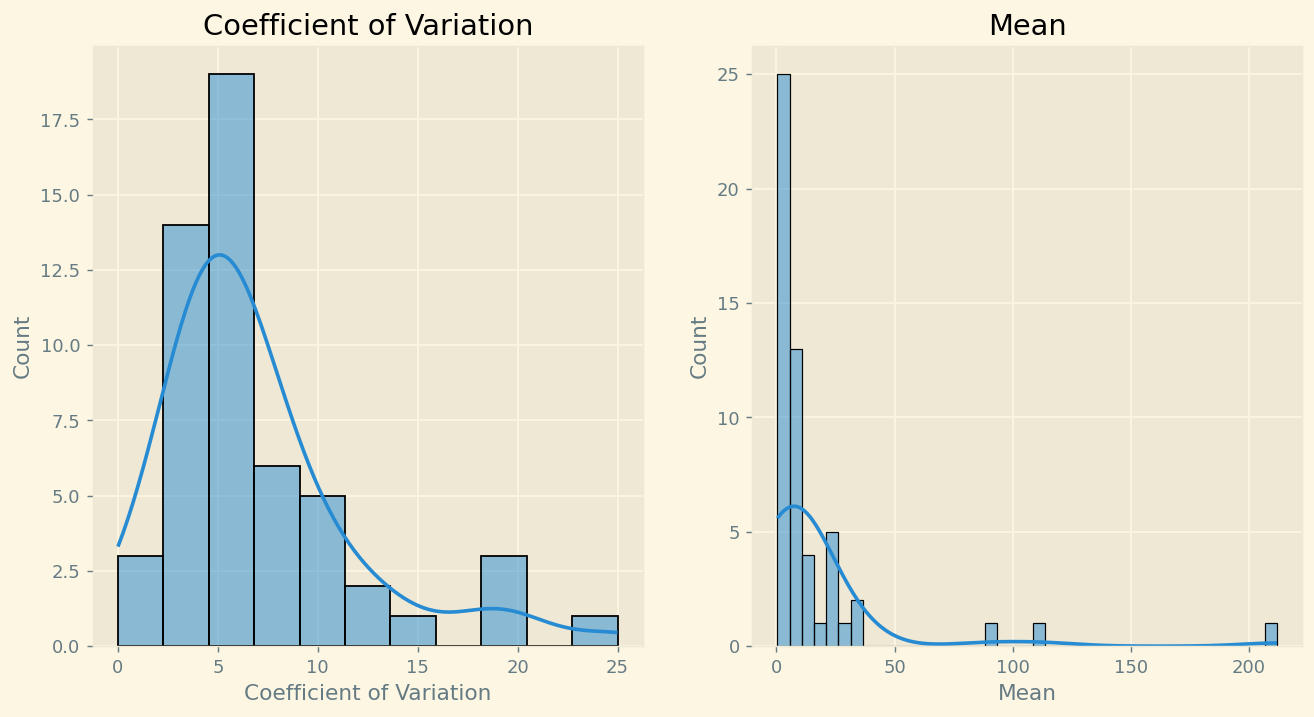

In [48]:
Graduates_HigherEdu1 = Graduates_HigherEdu.iloc[:54].copy()

cv_normality = stats.shapiro(Graduates_HigherEdu1['Coefficient of Variation'])
mean_normality = stats.shapiro(Graduates_HigherEdu1['Mean'])

print(f"Test for Coefficient of Variation: {cv_normality}\n")
print(f"Test for Mean: {mean_normality}")


plt.figure(figsize=(12, 6), dpi=130)

plt.subplot(1, 2, 1)
sns.histplot(Graduates_HigherEdu1['Coefficient of Variation'], kde=True)
plt.title('Coefficient of Variation')

plt.subplot(1, 2, 2)
sns.histplot(Graduates_HigherEdu1['Mean'], kde=True)
plt.title('Mean');

In [49]:
top10 = Graduates_HigherEdu[['Coefficient of Variation', 'Mean']].sort_values('Mean', ascending=False)[1:11]

corr_coefficient_PT, p_value_PT = stats.pearsonr(top10['Coefficient of Variation'], top10['Mean'])

corr_coefficient_ST, p_value_ST = stats.spearmanr(top10['Coefficient of Variation'], top10['Mean'])

In [50]:
tail10 = Graduates_HigherEdu[['Coefficient of Variation', 'Mean']].sort_values('Mean', ascending=False)[-1:-11:-1]

corr_coefficient_PB, p_value_PB = stats.pearsonr(tail10['Coefficient of Variation'], tail10['Mean'])

corr_coefficient_SB, p_value_SB = stats.spearmanr(tail10['Coefficient of Variation'], tail10['Mean'])

In [51]:

print(f"Spearman's correlation for top 10 fields: {corr_coefficient_ST:.2f}, p-value: {p_value_ST:.2f}\nPearson's correlation for top 10 fields: {corr_coefficient_PT:.2f}, p-value: {p_value_PT:.2f}\n")

print(f"Spearman's correlation for bottom 10 fields: {corr_coefficient_SB:.2f}, p-value: {p_value_SB:.2f}\nPearson's correlation for bottom 10 fields: {corr_coefficient_PB:.2f}, p-value: {p_value_PB:.2f}")


Spearman's correlation for top 10 fields: 0.62, p-value: 0.06
Pearson's correlation for top 10 fields: 0.79, p-value: 0.01

Spearman's correlation for bottom 10 fields: -0.24, p-value: 0.50
Pearson's correlation for bottom 10 fields: -0.21, p-value: 0.55


<div style="
    background: linear-gradient(135deg, #eafaf1, #d4f5e1); 
    border-left: 5px solid #58d68d; 
    border-bottom: 5px solid #58d68d;
    padding: 20px; 
    border-radius: 8px; 
    font-family: 'Inter', Arial, sans-serif;
    font-size: 16px;
    line-height: 1.6;
    box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);
    color: #2c3e50;">
    <strong style="font-size: 20px;">📊 Conclusions Based on Correlation Analysis</strong>    
    <h3 style="margin-top: 15px; color: #218c74;">1️⃣ Top 10 Fields (Highest Mean Number of Graduates, Excluding the Largest One)</h3>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>📈 <strong>Spearman's Correlation Coefficient</strong>: 0.62 (moderate positive correlation)</li>
        <li>📊 <strong>p-value</strong>: 0.056 (borderline statistical significance)</li>
    </ul>
    <p style="margin-top: 5px;">
        A moderate positive relationship exists between the mean number of graduates and the coefficient of variation in the top 10 fields.  
        This result suggests that in highly popular fields, graduation numbers fluctuate more. While the correlation using Pearson was 0.79 (stronger), it is important to note that Pearson's correlation assumes normality of the data. Given that the data for both variables deviate from normality, the Spearman correlation is more appropriate here. The result is borderline significant (p ≈ 0.05), indicating a moderate relationship, but with reduced statistical confidence.
    </p>
    <h3 style="margin-top: 15px; color: #218c74;">2️⃣ Bottom 10 Fields (Lowest Mean Number of Graduates)</h3>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>📉 <strong>Spearman's Correlation Coefficient</strong>: -0.24 (weak negative correlation)</li>
        <li>📊 <strong>p-value</strong>: 0.50 (not statistically significant)</li>
    </ul>
    <p style="margin-top: 5px;">
        There is no meaningful relationship between the mean number of graduates and the coefficient of variation in the least popular fields.  
        Both Pearson and Spearman correlations show weak and statistically insignificant results (r = -0.21, p = 0.55 for Pearson, and r = -0.24, p = 0.50 for Spearman).  
        This suggests that fluctuations in graduation numbers for these fields are not systematically related to their popularity.
    </p>
    <h3 style="margin-top: 15px; color: #218c74;">✅ General Conclusion</h3>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>📊 Popular fields exhibit greater fluctuations in graduate numbers, likely due to external factors such as demand, policy adjustments, and economic shifts. The correlation is moderate but borderline significant, with Spearman’s method being the more reliable due to non-normal data.</li>
        <li>📉 Less popular fields maintain relatively stable graduation rates, likely due to fixed quotas or niche specialization. The relationship between popularity and variability in graduation rates appears random for these fields.</li>
    </ul>

</div>


# <span style="color:transparent;">Analysis of Fully Funded Students</span>

<div style="
    background: linear-gradient(145deg, #4a6075, #5b728b);
    padding: 30px;
    text-align: center;
    color: #f8f8f8;
    position: relative;
    border-radius: 20px;
    box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
    filter: brightness(1.15);
    overflow: hidden;">
    <h1 style="font-family: 'Poppins', sans-serif; font-size: 34px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 4px rgba(255, 255, 255, 0.3);">
        Analysis of Fully Funded Students
    </h1>
</div>

## <span style="color:transparent;">Data Wrangling</span>

<div style="
    background: linear-gradient(145deg, #aa6dc1, #bf87da);
    padding: 25px;
    text-align: center;
    color: #f8f8f8;
    position: relative;
    border-radius: 15px;
    box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
    filter: brightness(1.15);
    overflow: hidden;">
    <h2 style="font-family: 'Poppins', sans-serif; font-size: 28px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 4px rgba(255, 255, 255, 0.3);">
        Data Wrangling
    </h2>
</div>

In [52]:
Students_HigherEdu_Paid = Students_HigherEdu_Paid.T  
Students_HigherEdu_Paid.columns = Students_HigherEdu_Paid.iloc[0]  
Students_HigherEdu_Paid = Students_HigherEdu_Paid.iloc[1:].reset_index().rename(columns={"index": "Year"})  
Students_HigherEdu_Paid.columns.name = None  

Students_HigherEdu_Paid

,Year,State-Funded Students (thousands),Percentage of Total Enrollment,Total Students (thousands)
0,2017/2018,"2 341,3",55.1,"4 245,9"
1,2018/2019,"2 250,0",54.1,"4 161,7"
2,2019/2020,2178.2,63.5,4068.3
3,2020/2021,2144.8,53.0,4049.3
4,2021/2022,2109.6,52.2,4044.2
5,2022/2023,2121.7,51.4,4130.0


In [53]:
Students_HigherEdu_Paid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Year                               6 non-null      object
 1   State-Funded Students (thousands)  6 non-null      object
 2   Percentage of Total Enrollment     6 non-null      object
 3   Total Students (thousands)         6 non-null      object
dtypes: object(4)
memory usage: 320.0+ bytes


In [54]:
Students_HigherEdu_Paid.iloc[:, 1:] = (
    Students_HigherEdu_Paid.iloc[:, 1:]
    .replace(r"[^\d,.-]", "", regex=True) 
    .replace(",", ".", regex=True) 
)

Students_HigherEdu_Paid.iloc[:, 1:] = Students_HigherEdu_Paid.iloc[:, 1:].apply(pd.to_numeric, errors="coerce")

Students_HigherEdu_Paid = Students_HigherEdu_Paid.astype({col: "float64" for col in Students_HigherEdu_Paid.columns[1:]})

In [55]:
Students_HigherEdu_Paid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               6 non-null      object 
 1   State-Funded Students (thousands)  6 non-null      float64
 2   Percentage of Total Enrollment     6 non-null      float64
 3   Total Students (thousands)         6 non-null      float64
dtypes: float64(3), object(1)
memory usage: 320.0+ bytes


## <span style="color:transparent;">Pattern Discovery</span>

<div style="
    background: linear-gradient(145deg, #aa6dc1, #bf87da);
    padding: 25px;
    text-align: center;
    color: #f8f8f8;
    position: relative;
    border-radius: 15px;
    box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
    filter: brightness(1.15);
    overflow: hidden;">
    <h2 style="font-family: 'Poppins', sans-serif; font-size: 28px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 4px rgba(255, 255, 255, 0.3);">
        Pattern Discovery
    </h2>
</div>


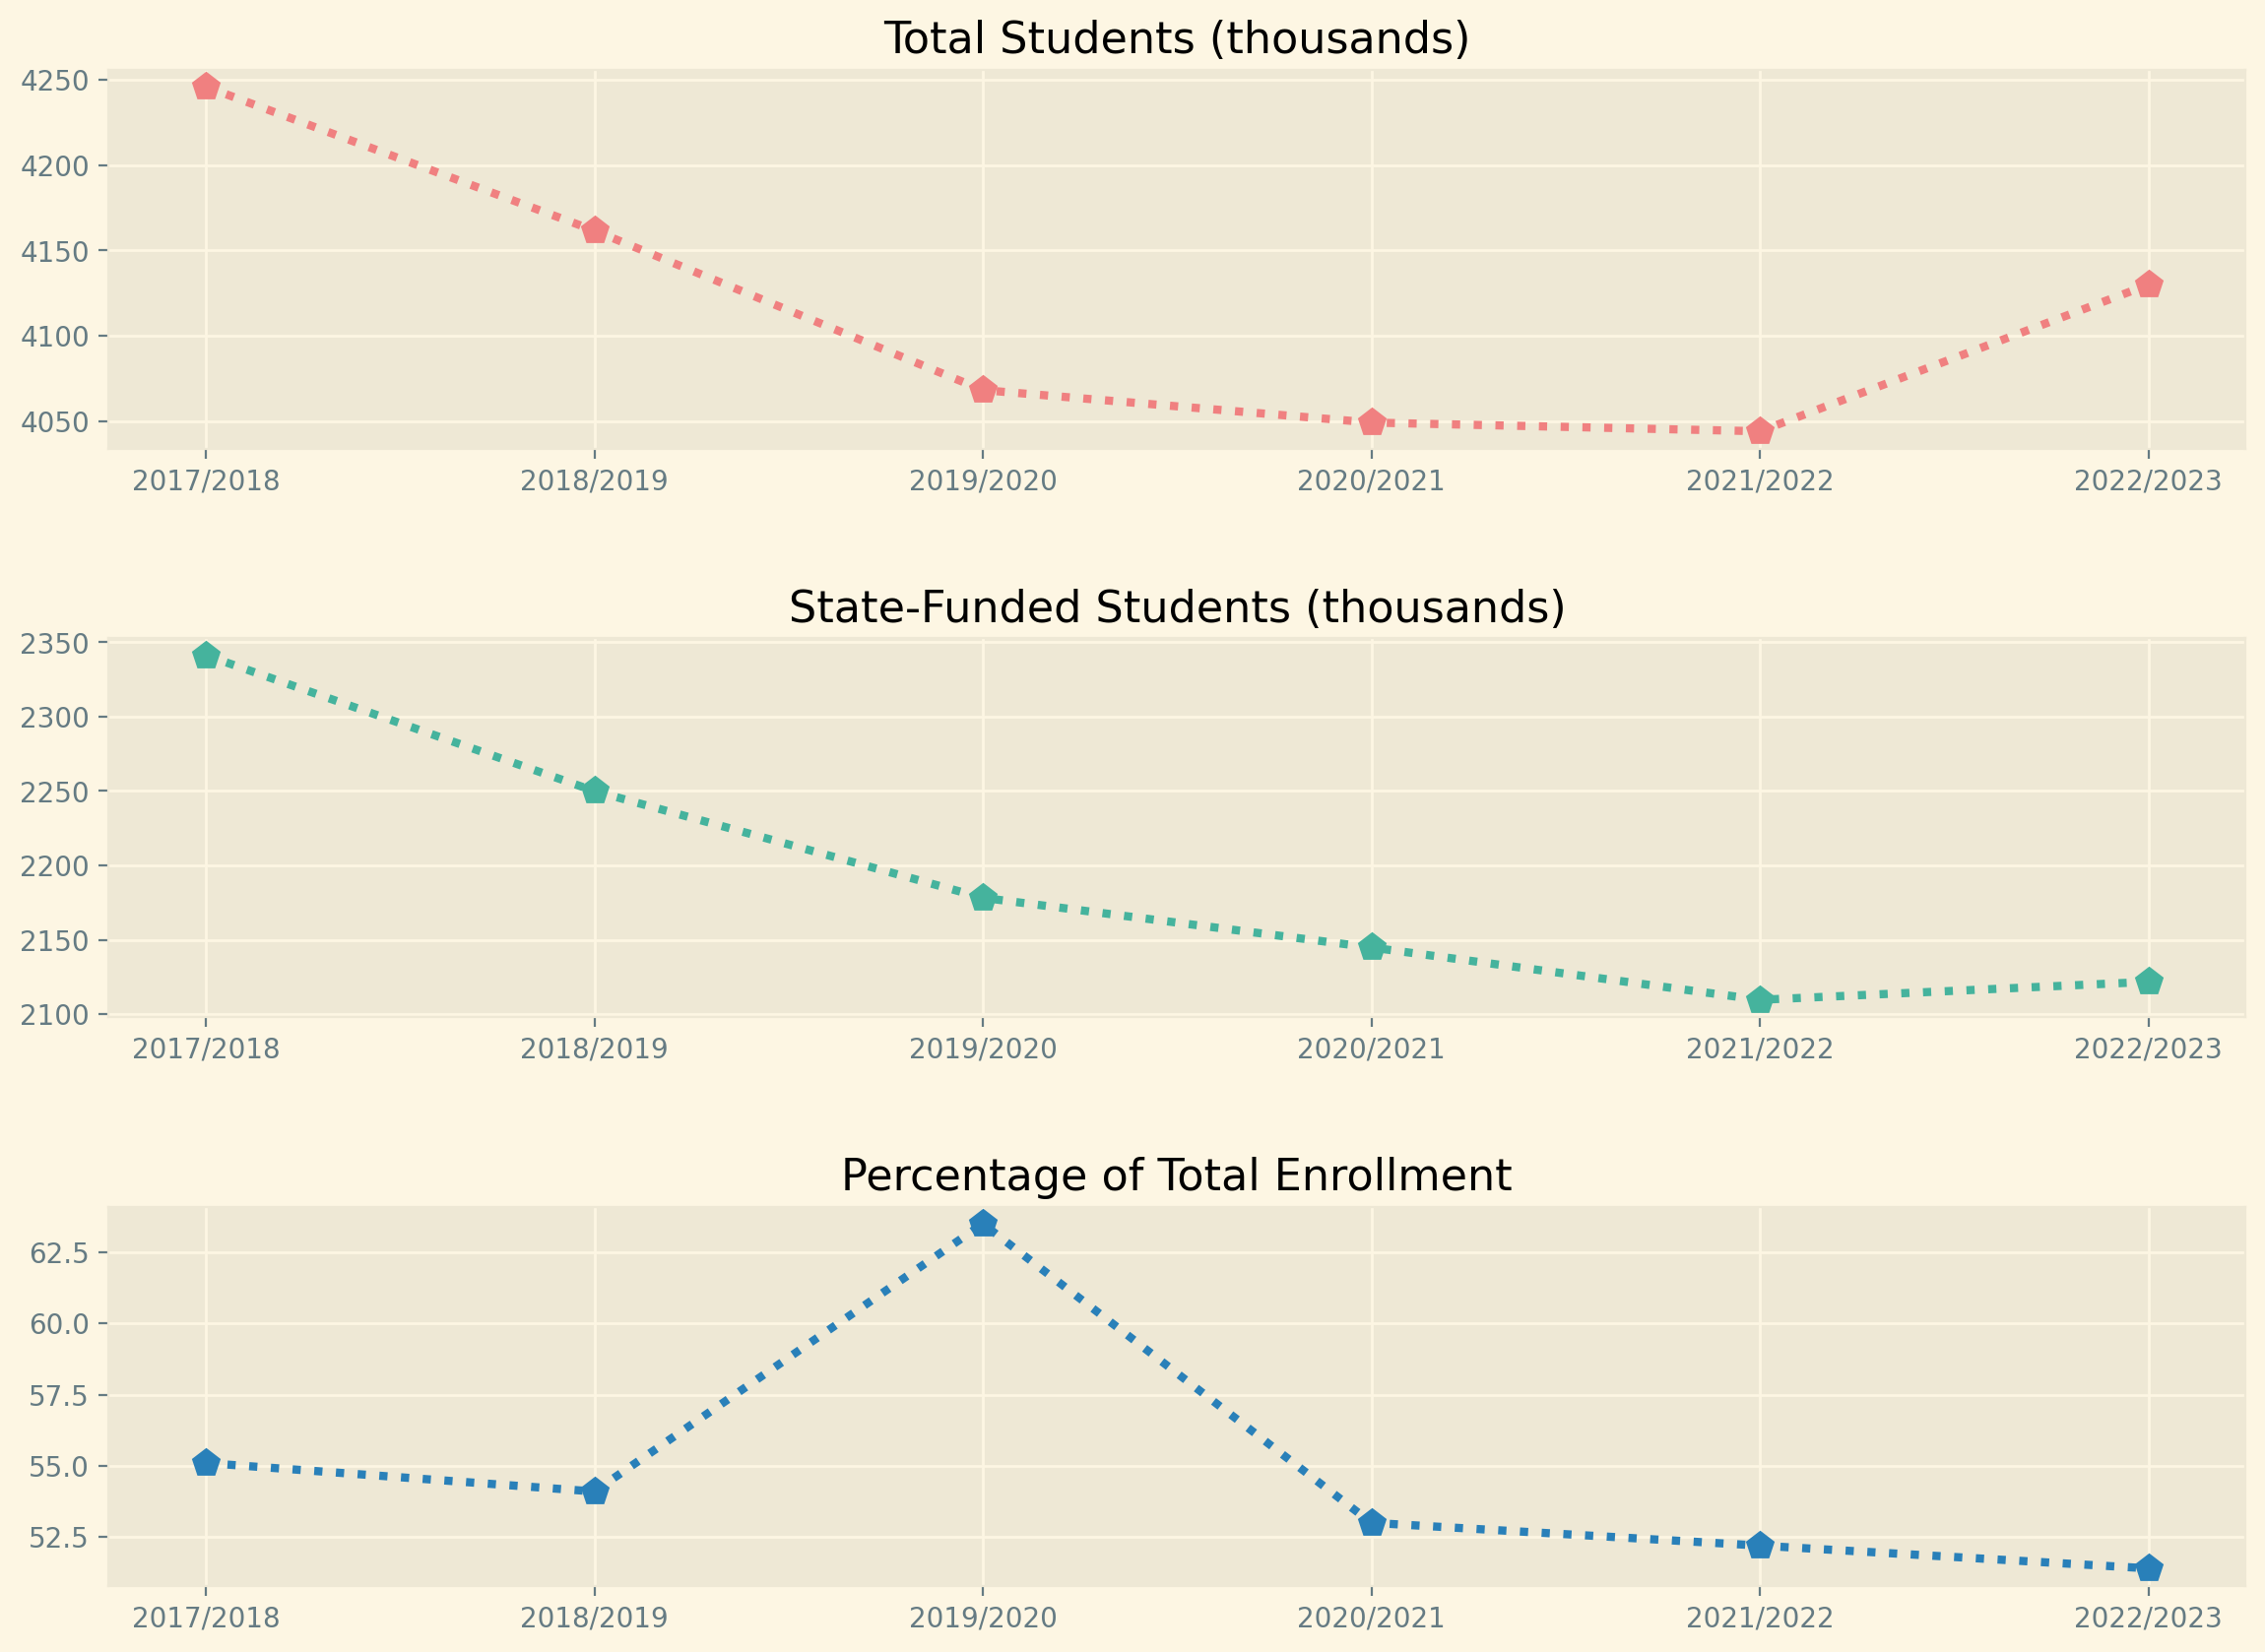

In [56]:
fig,axes = plt.subplots(nrows=3,ncols=1,figsize=(14,10),dpi=200)

axes[0].plot(Students_HigherEdu_Paid['Year'], Students_HigherEdu_Paid['Total Students (thousands)'], marker='p',ms=10,ls=':', lw=3,color='LightCoral')
axes[0].set_title('Total Students (thousands)')

axes[1].plot(Students_HigherEdu_Paid['Year'], Students_HigherEdu_Paid['State-Funded Students (thousands)'], marker='p',ms=10,ls=':', lw=3,color='#45b39d')
axes[1].set_title('State-Funded Students (thousands)')

axes[2].plot(Students_HigherEdu_Paid['Year'], Students_HigherEdu_Paid['Percentage of Total Enrollment'], marker='p',ms=10, ls=':', lw=3,color='#2980b9')
axes[2].set_title('Percentage of Total Enrollment')

plt.subplots_adjust(hspace=0.5)

<div style="
    background: linear-gradient(135deg, #eafaf1, #d4f5e1); 
    border-left: 5px solid #58d68d; 
    border-bottom: 5px solid #58d68d;
    padding: 20px; 
    border-radius: 8px; 
    font-family: 'Inter', Arial, sans-serif;
    font-size: 16px;
    line-height: 1.6;
    box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);
    color: #2c3e50;">
    <strong style="font-size: 20px;">📊 Important Observations from the Graphs</strong>    
    <h3 style="margin-top: 15px; color: #218c74;">1️⃣ Total Students (thousands)</h3>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>📉 There is a <strong>steady decline</strong> in the total number of students from <strong>2017/2018 to 2021/2022</strong>.</li>
        <li>📈 However, in <strong>2022/2023</strong>, a <strong>noticeable increase</strong> is observed, possibly due to <strong>demographic shifts, policy changes, or improved access to higher education</strong>.</li>
    </ul>
    <h3 style="margin-top: 15px; color: #218c74;">2️⃣ State-Funded Students (thousands)</h3>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>📉 The number of <strong>state-funded students</strong> has been <strong>consistently decreasing</strong> from <strong>2017 to 2021</strong>.</li>
        <li>📊 A <strong>slight increase</strong> in <strong>2022/2023</strong> is visible, but it <strong>does not compensate</strong> for the previous decline.</li>
    </ul>
    <h3 style="margin-top: 15px; color: #218c74;">3️⃣ Percentage of Total Enrollment</h3>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>⚡ A <strong>sharp spike</strong> occurred in <strong>2019/2020</strong>, where the proportion of state-funded students <strong>significantly increased</strong>.</li>
        <li>📉 After that, the percentage <strong>declined again</strong> and continued its downward trend, suggesting <strong>temporary government programs or funding policy changes</strong>.</li>
    </ul>

</div>


In [57]:
stats.spearmanr(Students_HigherEdu_Paid['Total Students (thousands)'], Students_HigherEdu_Paid['State-Funded Students (thousands)'])

SignificanceResult(statistic=0.8285714285714287, pvalue=0.04156268221574334)

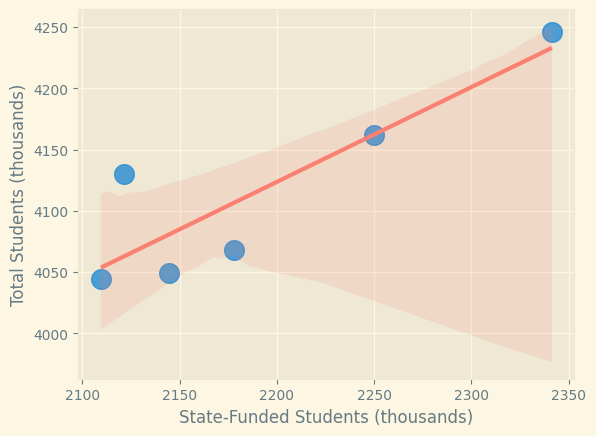

In [58]:
sns.regplot(y='Total Students (thousands)',  
            x='State-Funded Students (thousands)',  
            data=Students_HigherEdu_Paid,  
            scatter_kws={'s': 200}, 
            line_kws={'color': 'salmon'});

<div style="
    background: linear-gradient(135deg, #eafaf1, #d4f5e1); 
    border-left: 5px solid #58d68d; 
    border-bottom: 5px solid #58d68d;
    padding: 15px 20px; 
    border-radius: 8px; 
    font-family: 'Inter', Arial, sans-serif;
    font-size: 16px;
    line-height: 1.6;
    box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);
    color: #2c3e50;">
    <strong style="font-size: 18px;">📌 Key Takeaways</strong>
    <ul style="margin-top: 10px; padding-left: 20px;">
        <li><strong>Strong positive correlation (0.83)</strong> between total students and state-funded students.</li>
        <li><strong>Statistically significant (p = 0.041)</strong> at the 5% level, meaning the relationship is unlikely to be random.</li>
        <li>As the total number of students increases or decreases, the number of state-funded students follows a similar trend.</li>
        <li>Other factors (government funding, policy changes) may also influence this relationship.</li>
    </ul>
</div>


In [59]:
Students_HigherEdu_Paid

,Year,State-Funded Students (thousands),Percentage of Total Enrollment,Total Students (thousands)
0,2017/2018,2341.3,55.1,4245.9
1,2018/2019,2250.0,54.1,4161.7
2,2019/2020,2178.2,63.5,4068.3
3,2020/2021,2144.8,53.0,4049.3
4,2021/2022,2109.6,52.2,4044.2
5,2022/2023,2121.7,51.4,4130.0


---

 **Calculate the percentage change for three key metrics over time:**
 1. The number of state-funded students ("State-Funded Students (thousands)").
 2. The total number of students ("Total Students (thousands)").
 3. The percentage of total enrollment ("Percentage of Total Enrollment").
    
 **The pct_change() method computes the percentage change between consecutive values in each column, which helps to analyze trends and growth or decline in these metrics over time.**

---

In [60]:
State_Funded_Δ_pct = Students_HigherEdu_Paid["State-Funded Students (thousands)"].pct_change() * 100

State_Funded_Δ_pct.iloc[1:]

1   -3.899543
2   -3.191111
3   -1.533376
4   -1.641179
5    0.573568
Name: State-Funded Students (thousands), dtype: float64

In [61]:
Total_Students_Δ_pct = Students_HigherEdu_Paid["Total Students (thousands)"].pct_change() * 100

Total_Students_Δ_pct.iloc[1:]

1   -1.983090
2   -2.244275
3   -0.467026
4   -0.125948
5    2.121557
Name: Total Students (thousands), dtype: float64

In [62]:
Enrollment_Δ_pct = Students_HigherEdu_Paid["Percentage of Total Enrollment"].pct_change() * 100

Enrollment_Δ_pct.iloc[1:]

1    -1.814882
2    17.375231
3   -16.535433
4    -1.509434
5    -1.532567
Name: Percentage of Total Enrollment, dtype: float64

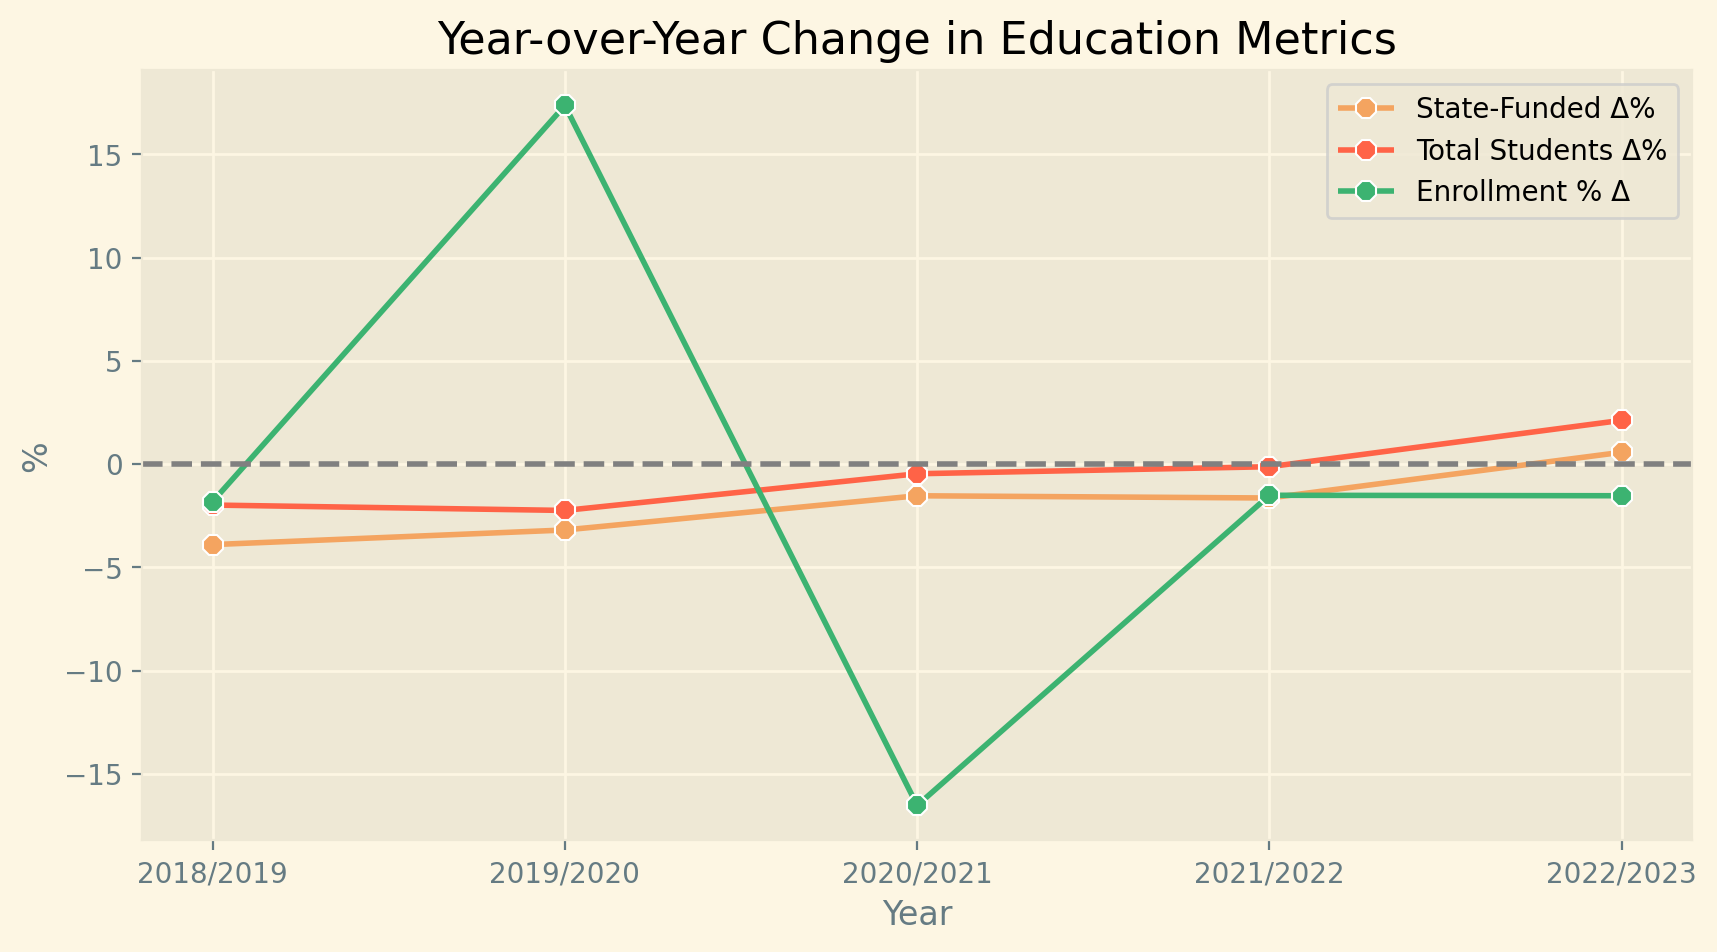

In [63]:
plt.figure(figsize=(10, 5),dpi=200)
sns.lineplot(data=Students_HigherEdu_Paid, x="Year", y=State_Funded_Δ_pct, color='SandyBrown', marker="8", ms=8, label="State-Funded Δ%")
sns.lineplot(data=Students_HigherEdu_Paid, x="Year", y=Total_Students_Δ_pct, color='Tomato', marker="8", ms=8, label="Total Students Δ%")
sns.lineplot(data=Students_HigherEdu_Paid, x="Year", y=Enrollment_Δ_pct, color='MediumSeaGreen', marker="8", ms=8, label="Enrollment % Δ")
plt.axhline(0, color="gray", linestyle="--")  # Линия нулевого изменения
plt.legend()
plt.title("Year-over-Year Change in Education Metrics")
plt.gca().set_ylabel("%");

<div style="
    background: linear-gradient(135deg, #eafaf1, #d4f5e1); 
    border-left: 5px solid #58d68d; 
    border-bottom: 5px solid #58d68d;
    padding: 20px; 
    border-radius: 8px; 
    font-family: 'Inter', Arial, sans-serif;
    font-size: 16px;
    line-height: 1.6;
    box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);
    color: #2c3e50;">
    <strong style="font-size: 20px;">📊 Main Findings from the Analysis</strong>
    <h3 style="margin-top: 15px; color: #218c74;">1️⃣ State-Funded Students (Budget Enrollment)</h3>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>📉 <strong>Consistent decline from 2017 to 2022</strong>, but <strong>a slight increase (+0.57%) in 2022/2023</strong>, marking the first growth in 5 years.</li>
        <li>⚠️ The <strong>sharpest drop was in 2018/2019 (-3.90%)</strong>, followed by a gradual slowdown in decline.</li>
    </ul>
    <h3 style="margin-top: 15px; color: #218c74;">2️⃣ Total Student Enrollment</h3>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>📉 <strong>Overall decline until 2022</strong>, but a <strong>notable increase in 2022/2023 (+2.12%)</strong>.</li>
        <li>📉 The biggest drop was in <strong>2019/2020 (-2.24%)</strong>, coinciding with a decline in budget enrollment.</li>
        <li>📊 <strong>The total student growth in 2022/2023 exceeded the growth in budget-funded students</strong>, suggesting a rise in self-funded (commercial) enrollments.</li>
    </ul>
    <h3 style="margin-top: 15px; color: #218c74;">3️⃣ Percentage of Budget Enrollment</h3>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>📈 <strong>2019/2020 saw a sudden spike (+17.38%)</strong>, potentially due to policy changes or external factors.</li>
        <li>📉 <strong>2020/2021 experienced a sharp correction (-16.53%)</strong>, almost reversing the previous year’s anomaly.</li>
        <li>📉 Since 2021, the percentage of budget-funded students has been <strong>steadily declining (-1.5% per year)</strong>.</li>
    </ul>
    <h3 style="margin-top: 20px; color: #58d68d;">✅ Key Takeaways & Hypotheses</h3>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>⚠️ <strong>2019/2020 appears to be an anomaly</strong>—possibly due to reforms or economic factors.</li>
        <li>📈 <strong>2022/2023 marks a turning point</strong>, with total student numbers rising for the first time in years.</li>
        <li>📊 <strong>The increase in total students outpaced the growth in budget enrollments</strong>, implying a rise in self-funded students.</li>
    </ul>

</div>


# <span style="color:transparent;">Study of University Students Across Russian Regions</span>

<div style="
    background: linear-gradient(145deg, #4a6075, #5b728b);
    padding: 30px;
    text-align: center;
    color: #f8f8f8;
    position: relative;
    border-radius: 20px;
    box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
    filter: brightness(1.15);
    overflow: hidden;">
    <h1 style="font-family: 'Poppins', sans-serif; font-size: 34px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 4px rgba(255, 255, 255, 0.3);">
        Study of University Students Across Russian Regions
    </h1>
</div>

## <span style="color:transparent;">Combining Regions into Districts for Analytical Convenience</span>

<div style="
    background: linear-gradient(145deg, #aa6dc1, #bf87da);
    padding: 25px;
    text-align: center;
    color: #f8f8f8;
    position: relative;
    border-radius: 15px;
    box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
    filter: brightness(1.15);
    overflow: hidden;">
    <h2 style="font-family: 'Poppins', sans-serif; font-size: 28px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 4px rgba(255, 255, 255, 0.3);">
        Combining Regions into Districts for Analytical Convenience
    </h2>
</div>

In [64]:
df_by_region.sort_values('Total_students', ascending=False).iloc[:20]

,Region,Total_students,Full_time,Blended_learning,Part_time,Year
0,Российская Федерация,4044203,2474778,264816,1304609,2021
1,Центральный федеральный округ,1312546,806080,120813,385653,2021
49,Приволжский федеральный округ,790789,468620,44393,277776,2021
19,г.Москва,759324,500339,87753,171232,2021
71,Сибирский федеральный округ,468614,288908,24009,155697,2021
20,Северо-Западный федеральный округ,428150,303912,17206,107032,2021
32,Южный федеральный округ,385993,224647,24316,137030,2021
30,г.Санкт-Петербург,315797,236664,13015,66118,2021
64,Уральский федеральный округ,282658,166528,13669,102461,2021
41,Северо-Кавказский федеральный округ,203062,109529,14556,78977,2021


In [65]:
df_by_region['Region'].count()

94

---

**Due to the large number of regions across Russia, it was decided to analyze the macro-regions (federal districts), which consolidate the subjects of the Russian Federation, as they are the largest administrative units, each containing several regions, oblasts, and major cities, for the sake of convenience in analysis.**

---

In [66]:
df_federal_districts = df_by_region[df_by_region["Region"].str.contains("федеральный округ", case=False, na=False)].copy()

In [67]:
df_federal_districts['Total_students'].sum() == df_by_region['Total_students'][df_by_region["Region"]=='Российская Федерация']

0    True
Name: Total_students, dtype: bool

In [68]:
df_federal_districts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 1 to 82
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Region            8 non-null      object
 1   Total_students    8 non-null      int64 
 2   Full_time         8 non-null      int64 
 3   Blended_learning  8 non-null      int64 
 4   Part_time         8 non-null      int64 
 5   Year              8 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 448.0+ bytes


In [69]:
df_federal_districts

,Region,Total_students,Full_time,Blended_learning,Part_time,Year
1,Центральный федеральный округ,1312546,806080,120813,385653,2021
20,Северо-Западный федеральный округ,428150,303912,17206,107032,2021
32,Южный федеральный округ,385993,224647,24316,137030,2021
41,Северо-Кавказский федеральный округ,203062,109529,14556,78977,2021
49,Приволжский федеральный округ,790789,468620,44393,277776,2021
64,Уральский федеральный округ,282658,166528,13669,102461,2021
71,Сибирский федеральный округ,468614,288908,24009,155697,2021
82,Дальневосточный федеральный округ,172391,106554,5854,59983,2021


In [70]:
df_federal_districts = df_federal_districts.reset_index().drop(['index','Year'], axis=1)

In [71]:
list_reg = ['Central Federal District', 'Northwestern Federal District', 'Southern Federal District', 'North Caucasian Federal District', 
            'Volga Federal District', 'Ural Federal District', 'Siberian Federal District', 'Far Eastern Federal District']

list_pop = [40000000, 13600000, 16600000, 10000000, 28600000, 12000000, 16800000, 8000000]

ser_reg = pd.Series(list_reg)
ser_pop = pd.Series(list_pop)

In [72]:
df_federal_districts['Region'] = ser_reg

df_federal_districts['Population'] = ser_pop

In [73]:
df_federal_districts = df_federal_districts.sort_values('Population', ascending=False).reset_index().drop('index', axis=1)

In [74]:
df_federal_districts = df_federal_districts[['Region', 'Population', 'Total_students', 'Full_time', 'Blended_learning', 'Part_time']]

## <span style="color:transparent;">Regional Trends in Study Formats</span>

<div style="
    background: linear-gradient(145deg, #aa6dc1, #bf87da);
    padding: 25px;
    text-align: center;
    color: #f8f8f8;
    position: relative;
    border-radius: 15px;
    box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
    filter: brightness(1.15);
    overflow: hidden;">
    <h2 style="font-family: 'Poppins', sans-serif; font-size: 28px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 4px rgba(255, 255, 255, 0.3);">
        Regional Trends in Study Formats
    </h2>
</div>

---

**The 'Enrollment_rate_%' column is calculated by dividing the total number of students ('Total_students') by the total population ('Population') of each federal district, then multiplying by 100 to express it as a percentage. This metric helps assess the level of educational coverage in each district, enabling comparisons across regions. It provides insights into how much of the population is engaged in education, highlighting areas with higher or lower enrollment rates and potentially revealing gaps in educational access.**

---

In [75]:
df_federal_districts["Enrollment_rate_%"] = np.round((df_federal_districts["Total_students"] / df_federal_districts["Population"]) * 100, 2)

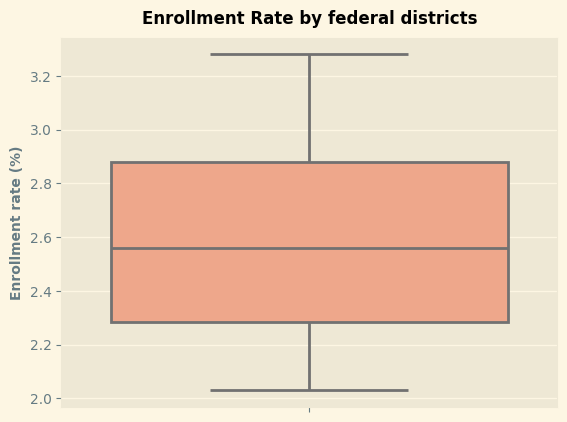

In [76]:
sns.boxplot(data=df_federal_districts, y="Enrollment_rate_%", color='LightSalmon')
plt.ylabel('Enrollment rate (%)', fontsize=10, fontweight='bold')
plt.title('Enrollment Rate by federal districts', fontsize=12, fontweight='bold', pad=10);

In [77]:
df_federal_districts

,Region,Population,Total_students,Full_time,Blended_learning,Part_time,Enrollment_rate_%
0,Central Federal District,40000000,1312546,806080,120813,385653,3.28
1,Volga Federal District,28600000,790789,468620,44393,277776,2.76
2,Siberian Federal District,16800000,468614,288908,24009,155697,2.79
3,Southern Federal District,16600000,385993,224647,24316,137030,2.33
4,Northwestern Federal District,13600000,428150,303912,17206,107032,3.15
5,Ural Federal District,12000000,282658,166528,13669,102461,2.36
6,North Caucasian Federal District,10000000,203062,109529,14556,78977,2.03
7,Far Eastern Federal District,8000000,172391,106554,5854,59983,2.15


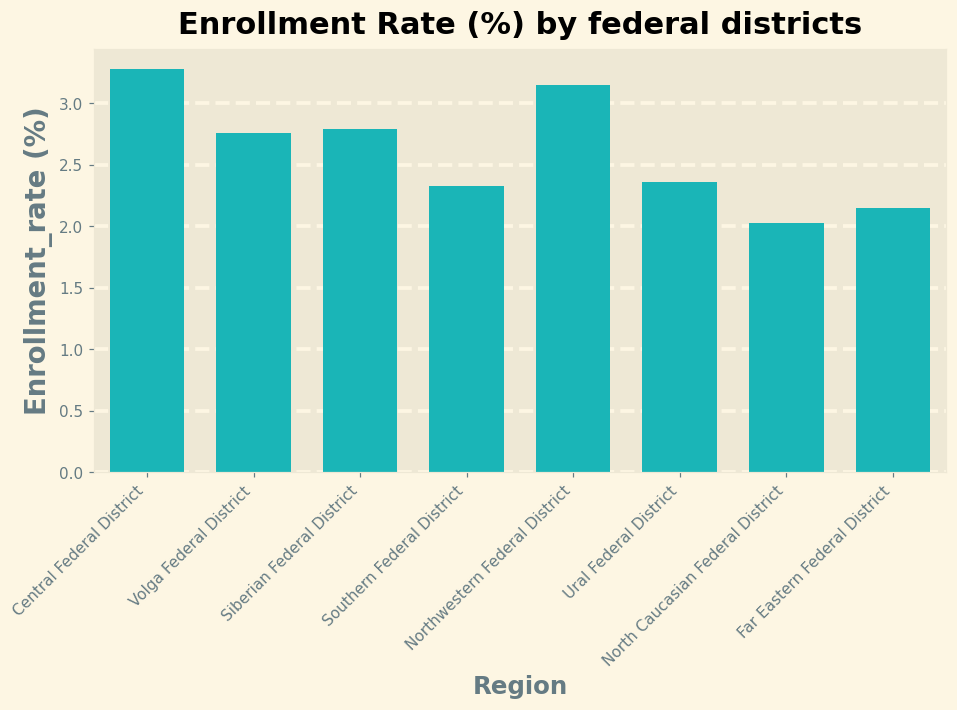

In [78]:
plt.figure(figsize=(10,5), dpi=110)

sns.barplot(data=df_federal_districts, x="Region", y="Enrollment_rate_%", color='DarkTurquoise', width=0.7)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', linewidth=2.5)

plt.xlabel('Region', fontsize=16, fontweight='bold')
plt.ylabel('Enrollment_rate (%)', fontsize=18, fontweight='bold')
plt.title('Enrollment Rate (%) by federal districts', fontsize=20, fontweight='bold', pad=10);

<div style="
    background: linear-gradient(135deg, #fdf6e3, #fae0a3); 
    border-left: 5px solid #f4b400; 
    border-bottom: 5px solid #f4b400;
    padding: 20px; 
    border-radius: 8px; 
    font-family: 'Inter', Arial, sans-serif;
    font-size: 16px;
    line-height: 1.6;
    box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);
    color: #5a3d0c;">
    <strong style="font-size: 20px;">📊 Key Insights from the Enrollment Rate (%) by Federal Districts</strong>   
    <h3 style="margin-top: 15px; color: #d35400;">1️⃣ The Central and Ural Federal Districts Have the Highest Enrollment Rates</h3>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>🏆 Their Enrollment Rate is slightly above <strong>3%</strong>, making them the leaders.</li>
        <li>🎓 This could be due to the <strong>high concentration of universities</strong> in these regions (e.g., Moscow, Yekaterinburg).</li>
    </ul>
    <h3 style="margin-top: 15px; color: #d35400;">2️⃣ The North Caucasian and Far Eastern Federal Districts Have the Lowest Rates</h3>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>📉 Their Enrollment Rate is just above <strong>2%</strong>, lagging behind other regions.</li>
        <li>🔍 Possible reasons:</li>
        <ul style="padding-left: 20px;">
            <li>🏫 <strong>Fewer universities</strong> and limited access to higher education.</li>
            <li>🚶 <strong>Student migration to other regions</strong> (e.g., moving to Moscow for studies).</li>
            <li>📊 <strong>Economic and demographic factors</strong>, potentially indicating lower demand for higher education.</li>
        </ul>
    </ul>
    <h3 style="margin-top: 15px; color: #d35400;">3️⃣ Other Districts Fall Within the Mid-Range</h3>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>⚖️ Their Enrollment Rate is around <strong>2.5–2.8%</strong>, suggesting a <strong>relatively even distribution of access to education</strong>.</li>
    </ul>

</div>


In [79]:
df_federal_districts[["Population", "Total_students"]].corr(method = 'spearman')

,Population,Total_students
Population,1.00000,0.97619
Total_students,0.97619,1.00000


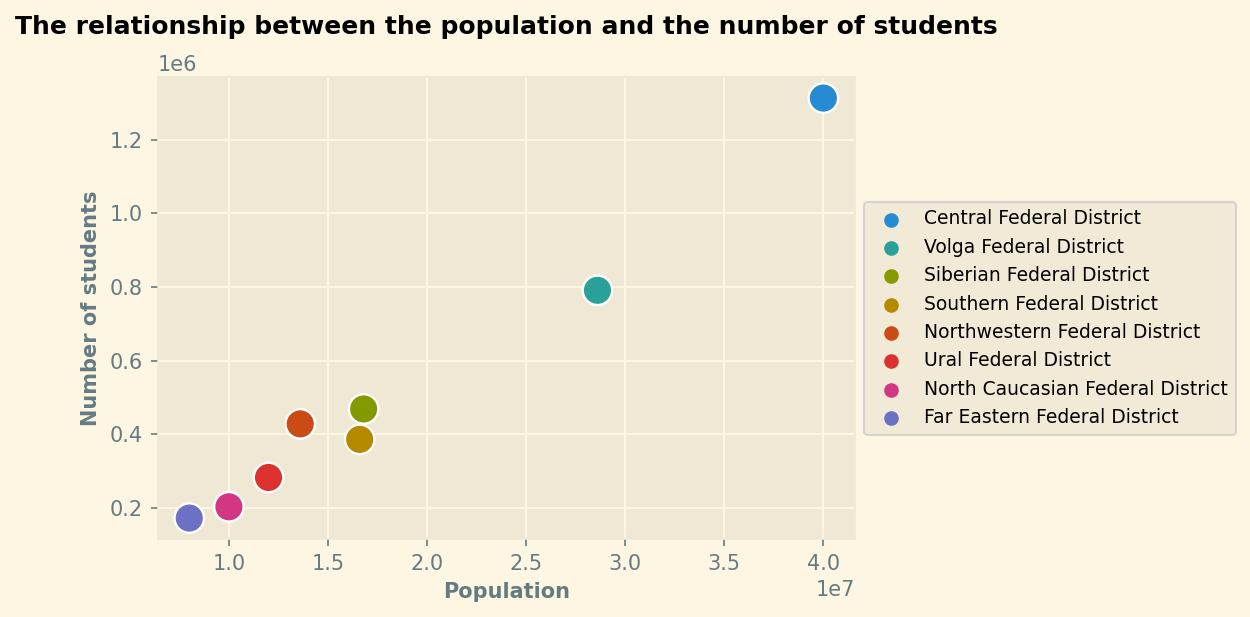

In [80]:
plt.figure(figsize=(6,4), dpi=150)

sns.scatterplot(data=df_federal_districts, x="Population", y="Total_students", hue="Region", s=200)
plt.legend(fontsize=9, loc='upper left', bbox_to_anchor=(1, 0.75))

plt.xlabel('Population', fontsize=10, fontweight='bold')
plt.ylabel('Number of students', fontsize=10, fontweight='bold')
plt.title('The relationship between the population and the number of students', fontsize=12, fontweight='bold', pad=10);

<div style="
    background: linear-gradient(135deg, #fdf6e3, #fae0a3); 
    border-left: 5px solid #f4b400; 
    border-bottom: 5px solid #f4b400;
    padding: 20px; 
    border-radius: 8px; 
    font-family: 'Inter', Arial, sans-serif;
    font-size: 16px;
    line-height: 1.6;
    box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);
    color: #5a3d0c;">
    <strong style="font-size: 20px;">📊 Key Takeaways from the Scatterplot: Population vs. Number of Students</strong>    
    <h3 style="margin-top: 15px; color: #d35400;">1️⃣ Strong Positive Correlation (0.99)</h3>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>📈 The correlation coefficient <strong>(0.9899)</strong> suggests an <strong>almost perfect linear relationship</strong> between population size and student enrollment.</li>
        <li>🎓 This means that federal districts with <strong>larger populations tend to have more students enrolled</strong> in higher education.</li>
    </ul>
    <h3 style="margin-top: 15px; color: #d35400;">2️⃣ Central Federal District Stands Out</h3>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>🏆 The <strong>Central Federal District (largest point on the right)</strong> has by far the <strong>highest population and the largest number of students</strong>.</li>
        <li>🏙️ This is likely due to <strong>Moscow’s dominance</strong> in higher education.</li>
    </ul>
    <h3 style="margin-top: 15px; color: #d35400;">3️⃣ All Other Districts Follow a Similar Trend</h3>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>📊 The remaining federal districts <strong>cluster closely along a straight-line trend</strong>, reinforcing the idea that <strong>student numbers are largely proportional to population size</strong>.</li>
        <li>✅ There are <strong>no clear outliers</strong> that deviate significantly from this pattern.</li>
    </ul>

</div>


In [81]:
df_federal_districts.corr(numeric_only=True, method = 'spearman')

,Population,Total_students,Full_time,Blended_learning,Part_time,Enrollment_rate_%
Population,1.000000,0.976190,0.928571,0.952381,1.000000,0.761905
Total_students,0.976190,1.000000,0.976190,0.904762,0.976190,0.857143
Full_time,0.928571,0.976190,1.000000,0.880952,0.928571,0.880952
Blended_learning,0.952381,0.904762,0.880952,1.000000,0.952381,0.619048
Part_time,1.000000,0.976190,0.928571,0.952381,1.000000,0.761905
Enrollment_rate_%,0.761905,0.857143,0.880952,0.619048,0.761905,1.000000


In [82]:
df_federal_districts["Full_time_rate"] = (df_by_region["Full_time"] / df_by_region["Total_students"])
df_federal_districts["Blended_learning_rate"] = (df_by_region["Blended_learning"] / df_by_region["Total_students"])
df_federal_districts["Part_time_rate"] = (df_by_region["Part_time"] / df_by_region["Total_students"])

In [83]:
top_full_time = df_federal_districts.loc[df_federal_districts["Full_time_rate"].idxmax(), ["Region", "Full_time_rate"]]
bottom_full_time = df_federal_districts.loc[df_federal_districts["Full_time_rate"].idxmin(), ["Region", "Full_time_rate"]]

top_part_time = df_federal_districts.loc[df_federal_districts["Part_time_rate"].idxmax(), ["Region", "Part_time_rate"]]
bottom_part_time = df_federal_districts.loc[df_federal_districts["Part_time_rate"].idxmin(), ["Region", "Part_time_rate"]]

top_blended = df_federal_districts.loc[df_federal_districts["Blended_learning_rate"].idxmax(), ["Region", "Blended_learning_rate"]]
bottom_blended = df_federal_districts.loc[df_federal_districts["Blended_learning_rate"].idxmin(), ["Region", "Blended_learning_rate"]]

print("Regions with the highest and lowest share of students by study mode:")
print(f"Full-time: {top_full_time['Region']} ({top_full_time['Full_time_rate']:.2%}) / {bottom_full_time['Region']} ({bottom_full_time['Full_time_rate']:.2%})")
print(f"Part-time: {top_part_time['Region']} ({top_part_time['Part_time_rate']:.2%}) / {bottom_part_time['Region']} ({bottom_part_time['Part_time_rate']:.2%})")
print(f"Blended learning: {top_blended['Region']} ({top_blended['Blended_learning_rate']:.2%}) / {bottom_blended['Region']} ({bottom_blended['Blended_learning_rate']:.2%})")


Regions with the highest and lowest share of students by study mode:
Full-time: North Caucasian Federal District (63.34%) / Northwestern Federal District (45.71%)
Part-time: Siberian Federal District (44.79%) / Volga Federal District (29.38%)
Blended learning: Northwestern Federal District (11.72%) / Siberian Federal District (2.53%)


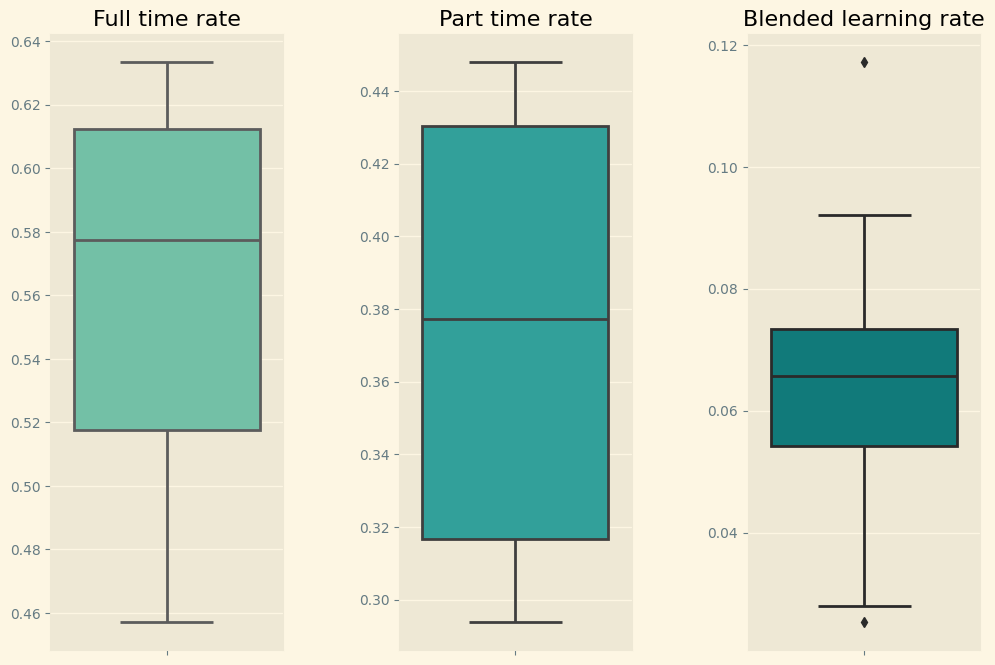

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,8))

sns.boxplot(data=df_federal_districts, y='Full_time_rate', ax=ax[0], color='MediumAquamarine')
ax[0].set_ylabel('')
ax[0].set_title('Full time rate')
ax[0].yaxis.set_major_locator(MultipleLocator(0.02))

sns.boxplot(data=df_federal_districts, y='Part_time_rate', ax=ax[1], color='LightSeaGreen')
ax[1].set_ylabel('')
ax[1].set_title('Part time rate')

sns.boxplot(data=df_federal_districts, y='Blended_learning_rate', ax=ax[2], color='DarkCyan')
ax[2].set_ylabel('')
ax[2].set_title('Blended learning rate')

fig.subplots_adjust(wspace=0.5)

In [85]:
df_federal_districts[['Region','Full_time_rate', 'Blended_learning_rate', 'Part_time_rate']]

,Region,Full_time_rate,Blended_learning_rate,Part_time_rate
0,Central Federal District,0.611932,0.065480,0.322587
1,Volga Federal District,0.614135,0.092045,0.293821
2,Siberian Federal District,0.526789,0.025318,0.447892
3,Southern Federal District,0.489624,0.065927,0.444449
4,Northwestern Federal District,0.457110,0.117168,0.425722
5,Ural Federal District,0.589935,0.027884,0.382180
6,North Caucasian Federal District,0.633425,0.067104,0.299471
7,Far Eastern Federal District,0.564823,0.063058,0.372120


<div style="
    background: linear-gradient(135deg, #fdf6e3, #fae0a3); 
    border-left: 5px solid #f4b400; 
    border-bottom: 5px solid #f4b400;
    padding: 20px; 
    border-radius: 8px; 
    font-family: 'Inter', Arial, sans-serif;
    font-size: 16px;
    line-height: 1.6;
    box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);
    color: #5a3d0c;">    
    <strong style="font-size: 20px;">📊 Insights from Boxplots and Data</strong>    
    <h3 style="margin-top: 15px; color: #d35400;">1️⃣ Full-time Enrollment Rate</h3>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>🏆 <strong>North Caucasian Federal District has the highest full-time enrollment rate (63.34%)</strong>, while <strong>Northwestern Federal District has the lowest (45.71%)</strong>.</li>
        <li>📊 The boxplot shows that most regions have a full-time rate between approximately <strong>50% and 62%</strong>, with some variability.</li>
        <li>📌 No extreme outliers detected, but the distribution suggests that <strong>the majority of students in most regions study full-time</strong>.</li>
    </ul>
    <h3 style="margin-top: 15px; color: #d35400;">2️⃣ Part-time Enrollment Rate</h3>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>📈 <strong>Siberian Federal District has the highest part-time rate (44.79%)</strong>, whereas <strong>Volga Federal District has the lowest (29.38%)</strong>.</li>
        <li>📊 The boxplot indicates a <strong>more spread-out distribution</strong>, suggesting that part-time study rates vary significantly between regions.</li>
        <li>📌 Some regions have a relatively high proportion of part-time students, possibly due to <strong>local employment opportunities or accessibility to education</strong>.</li>
    </ul>
    <h3 style="margin-top: 15px; color: #d35400;">3️⃣ Blended Learning Enrollment Rate</h3>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>📊 <strong>Northwestern Federal District has the highest share of blended learning students (11.72%)</strong>, while <strong>Siberian Federal District has the lowest (2.53%)</strong>.</li>
        <li>📌 The boxplot highlights that <strong>blended learning is the least common study mode</strong>, with most regions having rates below <strong>10%</strong>.</li>
        <li>📈 There is some variation, but a few regions show <strong>slightly higher adoption of blended learning</strong> compared to others.</li>
    </ul>
    <h3 style="margin-top: 20px; color: #f4b400;">✅ General Observations</h3>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>🎓 <strong>Full-time education remains the dominant study mode</strong> across all federal districts.</li>
        <li>📊 <strong>The distribution of part-time students is more variable</strong>, potentially influenced by socioeconomic factors and regional policies.</li>
        <li>🖥️ <strong>Blended learning is not widely adopted yet</strong>, with only a few regions showing a noticeable percentage.</li>
    </ul>

</div>


# <span style="color:transparent;">Exploratory Relationship Analysis</span>

<div style="
    background: linear-gradient(145deg, #4a6075, #5b728b);
    padding: 30px;
    text-align: center;
    color: #f8f8f8;
    position: relative;
    border-radius: 20px;
    box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
    filter: brightness(1.15);
    overflow: hidden;">
    <h1 style="font-family: 'Poppins', sans-serif; font-size: 34px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 4px rgba(255, 255, 255, 0.3);">
        Exploratory Relationship Analysis
    </h1>
</div>

## <span style="color:transparent;">Data Wrangling and Preprocessing</span>

<div style="
    background: linear-gradient(145deg, #aa6dc1, #bf87da);
    padding: 25px;
    text-align: center;
    color: #f8f8f8;
    position: relative;
    border-radius: 15px;
    box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
    filter: brightness(1.15);
    overflow: hidden;">
    <h2 style="font-family: 'Poppins', sans-serif; font-size: 28px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 4px rgba(255, 255, 255, 0.3);">
        Data Wrangling and Preprocessing
    </h2>
</div>

In [86]:
tab = Edu_Service_Prices.iloc[3:5, 0:7].T.copy()

In [87]:
tab.rename_axis(None, axis=1).reset_index()
tab.columns = tab.iloc[0]
tab = tab[1:].reset_index(drop=True)
tab = tab.rename_axis(None, axis=1)

In [88]:
tab

,Private Higher Edu (per semester),Public Higher Edu (per semester)
0,47292.17,57702.9
1,51334.99,68260.1
2,57867.67,74698.98
3,53247.17,73170.35
4,63013.78,77930.09
5,56387.03,77926.25


In [89]:
Students_HigherEdu_Paid['Fee-Paying Students'] = Students_HigherEdu_Paid['Total Students (thousands)'] - Students_HigherEdu_Paid['State-Funded Students (thousands)']

In [90]:
Students_HigherEdu_Paid

,Year,State-Funded Students (thousands),Percentage of Total Enrollment,Total Students (thousands),Fee-Paying Students
0,2017/2018,2341.3,55.1,4245.9,1904.6
1,2018/2019,2250.0,54.1,4161.7,1911.7
2,2019/2020,2178.2,63.5,4068.3,1890.1
3,2020/2021,2144.8,53.0,4049.3,1904.5
4,2021/2022,2109.6,52.2,4044.2,1934.6
5,2022/2023,2121.7,51.4,4130.0,2008.3


In [91]:
edu_df = pd.concat([Students_HigherEdu_Paid, tab], axis=1)

In [92]:
edu_df['Percentage of Fee-Paying Students'] = 100 - edu_df['Percentage of Total Enrollment']
edu_df['Public Higher Edu (per year)'] = (edu_df['Public Higher Edu (per semester)'] * 2).round(0)
edu_df['Private Higher Edu (per year)'] = (edu_df['Private Higher Edu (per semester)'] * 2).round(0)
edu_df

,Year,State-Funded Students (thousands),Percentage of Total Enrollment,Total Students (thousands),Fee-Paying Students,Private Higher Edu (per semester),Public Higher Edu (per semester),Percentage of Fee-Paying Students,Public Higher Edu (per year),Private Higher Edu (per year)
0,2017/2018,2341.3,55.1,4245.9,1904.6,47292.17,57702.9,44.9,115405.8,94584.34
1,2018/2019,2250.0,54.1,4161.7,1911.7,51334.99,68260.1,45.9,136520.2,102669.98
2,2019/2020,2178.2,63.5,4068.3,1890.1,57867.67,74698.98,36.5,149397.96,115735.34
3,2020/2021,2144.8,53.0,4049.3,1904.5,53247.17,73170.35,47.0,146340.7,106494.34
4,2021/2022,2109.6,52.2,4044.2,1934.6,63013.78,77930.09,47.8,155860.18,126027.56
5,2022/2023,2121.7,51.4,4130.0,2008.3,56387.03,77926.25,48.6,155852.5,112774.06


In [93]:
print(edu_df.dtypes)

Year                                  object
State-Funded Students (thousands)    float64
Percentage of Total Enrollment       float64
Total Students (thousands)           float64
Fee-Paying Students                  float64
Private Higher Edu (per semester)     object
Public Higher Edu (per semester)      object
Percentage of Fee-Paying Students    float64
Public Higher Edu (per year)          object
Private Higher Edu (per year)         object
dtype: object


In [94]:
print(edu_df.columns.tolist())

['Year', 'State-Funded Students (thousands)', 'Percentage of Total Enrollment', 'Total Students (thousands)', 'Fee-Paying Students', 'Private Higher Edu (per semester)', 'Public Higher Edu (per semester)', 'Percentage\xa0of\xa0Fee-Paying\xa0Students', 'Public\xa0Higher\xa0Edu\xa0(per\xa0year)', 'Private\xa0Higher\xa0Edu\xa0(per\xa0year)']


In [95]:
edu_df.columns = edu_df.columns.str.replace('\xa0', ' ', regex=False)

In [96]:
edu_df[['Public Higher Edu (per year)', 'Private Higher Edu (per year)']] = edu_df[['Public Higher Edu (per year)', 'Private Higher Edu (per year)']].astype('int64')

In [97]:
print(edu_df.dtypes)

Year                                  object
State-Funded Students (thousands)    float64
Percentage of Total Enrollment       float64
Total Students (thousands)           float64
Fee-Paying Students                  float64
Private Higher Edu (per semester)     object
Public Higher Edu (per semester)      object
Percentage of Fee-Paying Students    float64
Public Higher Edu (per year)           int64
Private Higher Edu (per year)          int64
dtype: object


In [98]:
edu_df.drop(columns=['Private Higher Edu (per semester)', 'Public Higher Edu (per semester)'], axis=1,inplace=True)

In [99]:
edu_df = edu_df[['Year', 'Total Students (thousands)', 'State-Funded Students (thousands)', 'Fee-Paying Students', 'Percentage of Total Enrollment', 'Percentage of Fee-Paying Students', 'Public Higher Edu (per year)', 'Private Higher Edu (per year)']]

In [100]:
edu_df

,Year,Total Students (thousands),State-Funded Students (thousands),Fee-Paying Students,Percentage of Total Enrollment,Percentage of Fee-Paying Students,Public Higher Edu (per year),Private Higher Edu (per year)
0,2017/2018,4245.9,2341.3,1904.6,55.1,44.9,115405,94584
1,2018/2019,4161.7,2250.0,1911.7,54.1,45.9,136520,102669
2,2019/2020,4068.3,2178.2,1890.1,63.5,36.5,149397,115735
3,2020/2021,4049.3,2144.8,1904.5,53.0,47.0,146340,106494
4,2021/2022,4044.2,2109.6,1934.6,52.2,47.8,155860,126027
5,2022/2023,4130.0,2121.7,2008.3,51.4,48.6,155852,112774


## <span style="color:transparent;">Exploring Patterns in Paid Student Numbers</span>

<div style="
    background: linear-gradient(145deg, #aa6dc1, #bf87da);
    padding: 25px;
    text-align: center;
    color: #f8f8f8;
    position: relative;
    border-radius: 15px;
    box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
    filter: brightness(1.15);
    overflow: hidden;">
    <h2 style="font-family: 'Poppins', sans-serif; font-size: 28px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 4px rgba(255, 255, 255, 0.3);">
        Exploring Patterns in Paid Student Numbers
    </h2>
</div>

In [101]:
edu_df.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Total Students (thousands),6.0,4116.6,78.8,4044.2,4054.0,4099.2,4153.8,4245.9
State-Funded Students (thousands),6.0,2190.9,89.2,2109.6,2127.5,2161.5,2232.0,2341.3
Fee-Paying Students,6.0,1925.6,43.0,1890.1,1904.5,1908.1,1928.9,2008.3
Percentage of Total Enrollment,6.0,54.9,4.4,51.4,52.4,53.6,54.8,63.5
Percentage of Fee-Paying Students,6.0,45.1,4.4,36.5,45.2,46.4,47.6,48.6
Public Higher Edu (per year),6.0,143229.0,15399.9,115405.0,138975.0,147868.5,154238.2,155860.0
Private Higher Edu (per year),6.0,109713.8,10960.4,94584.0,103625.2,109634.0,114994.8,126027.0


In [102]:
columns_to_check = edu_df.columns[1:] 
normality_results = {}

for col in columns_to_check:
    p = stats.shapiro(edu_df[col])[1]
    normality_results[col] = {"p_value": p.round(2)}

print("         --- Shapiro-Wilk Normality Test ---\n")
print(pd.DataFrame(normality_results))

         --- Shapiro-Wilk Normality Test ---

         Total Students (thousands)  State-Funded Students (thousands)  \
p_value                        0.35                               0.31   

         Fee-Paying Students  Percentage of Total Enrollment  \
p_value                 0.04                            0.03   

         Percentage of Fee-Paying Students  Public Higher Edu (per year)  \
p_value                               0.03                          0.15   

         Private Higher Edu (per year)  
p_value                            1.0  


---

**Normality Test Results:**
- **Shapiro-Wilk p > 0.05** → The data is normally distributed  
  ✅ `Total Students`, `State-Funded Students`, `Public Higher Edu (per year)`, `Private Higher Edu (per year)`

- **Shapiro-Wilk p < 0.05** → The data is not normally distributed  
  ❌ `Fee-Paying Students`, `Percentage of Total Enrollment`, `Percentage of Fee-Paying Students`

**Conclusion:**
Since the data is partially non-normal, it is more reliable to use **Spearman's correlation**.

---

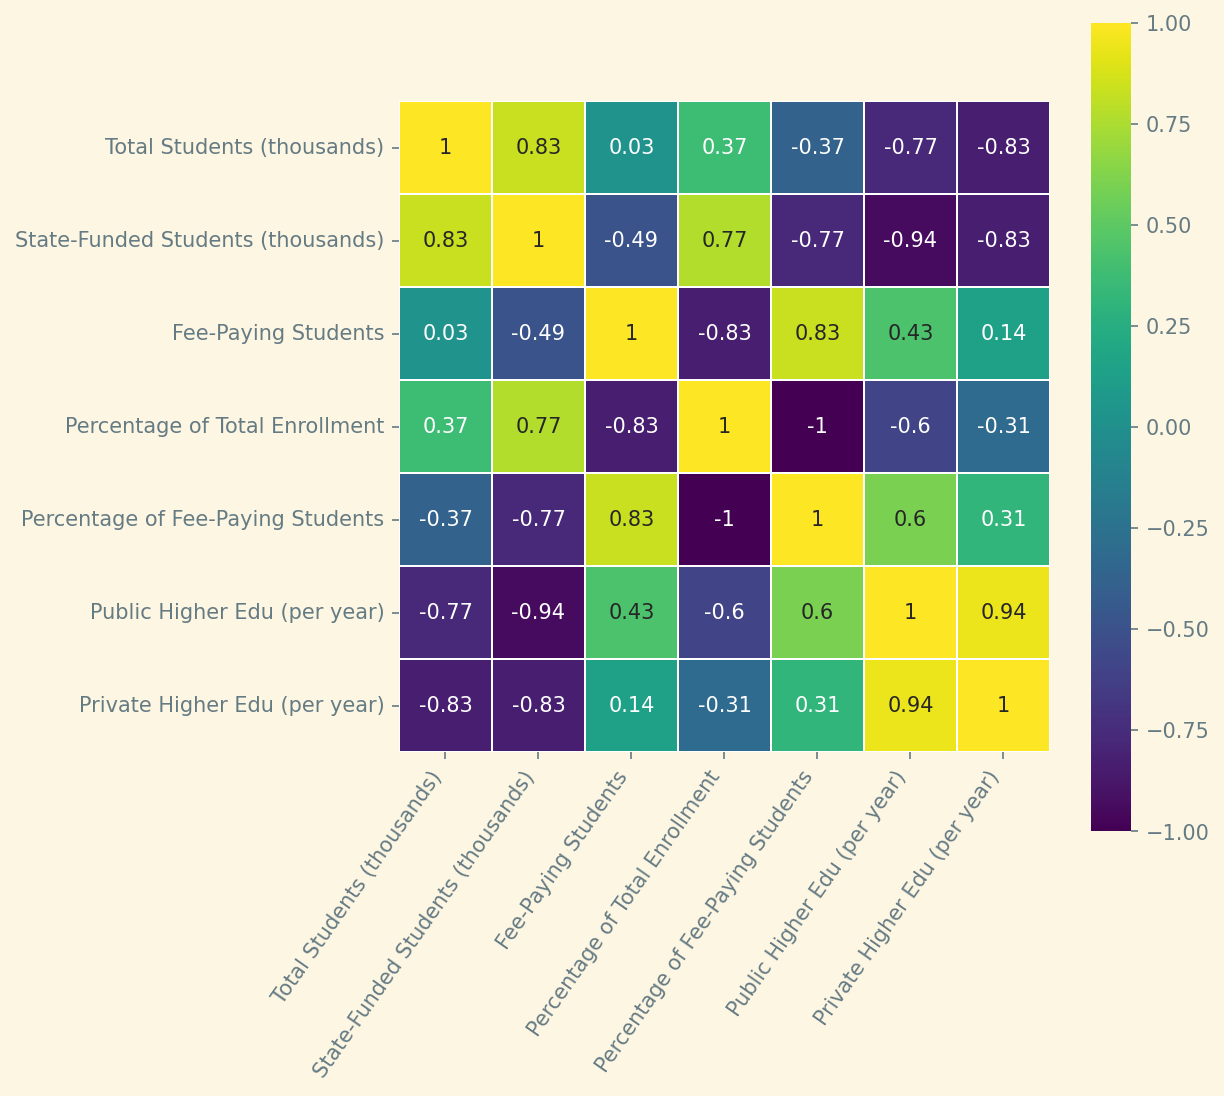

In [103]:
fig = plt.figure(figsize=(7,7), dpi=150)
sns.heatmap(edu_df.corr(method='spearman', numeric_only=True).round(2), linewidth=0.2, annot=True, square=True, cmap='viridis')
plt.xticks(rotation=55, ha='right');

<div style="
    background: linear-gradient(135deg, #f5e6ff, #e8d1f2); 
    border-left: 5px solid #9b59b6; 
    border-bottom: 5px solid #9b59b6;
    padding: 20px; 
    border-radius: 8px; 
    font-family: 'Inter', Arial, sans-serif;
    font-size: 16px;
    line-height: 1.6;
    box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);
    color: #2c3e50;">
    <strong style="font-size: 20px; color: #8e44ad;">📊 Conclusions on the matrix</strong>    
    <h3 style="margin-top: 15px; color: #9b59b6;">1️⃣ Relationship Between Students and Tuition Fees</h3>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>💸 <strong>More students are associated with lower tuition fees</strong>, especially in public universities.</li>
        <li>📉 A higher number of state-funded students leads to fewer fee-paying students and lower tuition costs.</li>
    </ul>
    <h3 style="margin-top: 15px; color: #9b59b6;">2️⃣ Fee-Paying Students and Enrollment</h3>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>📊 The share of fee-paying students is <strong>inversely related to overall higher education enrollment</strong>.</li>
    </ul>
    <h3 style="margin-top: 15px; color: #9b59b6;">3️⃣ Tuition Fee Trends</h3>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>🔄 Tuition fees in <strong>public and private universities tend to change in sync</strong>.</li>
    </ul>
    <h3 style="margin-top: 15px; color: #9b59b6;">4️⃣ State-Funded Students and Enrollment</h3>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>📈 A higher percentage of state-funded students <strong>strongly correlates with increased overall enrollment</strong>.</li>
    </ul>

</div>

## <span style="color:transparent;">Pre/Post Analysis</span>

<div style="
    background: linear-gradient(145deg, #aa6dc1, #bf87da);
    padding: 25px;
    text-align: center;
    color: #f8f8f8;
    position: relative;
    border-radius: 15px;
    box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
    filter: brightness(1.15);
    overflow: hidden;">
    <h2 style="font-family: 'Poppins', sans-serif; font-size: 28px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 4px rgba(255, 255, 255, 0.3);">
        Pre/Post Analysis
    </h2>
</div>

In [104]:
fee_paying_students = edu_df['Fee-Paying Students']  
public_edu_fees = edu_df['Public Higher Edu (per year)'] 

fee_paying_before = fee_paying_students[:3]  
fee_paying_after = fee_paying_students[3:]   

shapiro_before = stats.shapiro(fee_paying_before)
shapiro_after = stats.shapiro(fee_paying_after)

mann_whitney_test = stats.mannwhitneyu(fee_paying_before, fee_paying_after, alternative='two-sided')

shapiro_before.statistic.round(2), shapiro_before.pvalue.round(3),shapiro_after.statistic.round(2), shapiro_after.pvalue.round(3), mann_whitney_test.statistic.round(2), mann_whitney_test.pvalue.round(2)

(0.96, 0.627, 0.94, 0.546, 2.0, 0.4)

<div style="
    background: linear-gradient(135deg, #f5e6ff, #e8d1f2); 
    border-left: 5px solid #9b59b6; 
    border-bottom: 5px solid #9b59b6;
    padding: 20px; 
    border-radius: 8px; 
    font-family: 'Inter', Arial, sans-serif;
    font-size: 16px;
    line-height: 1.6;
    box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);
    color: #2c3e50;">
    <strong style="font-size: 20px; color: #8e44ad;">📊 Impact of Economic Changes on Paid Student Numbers</strong>    
    <h3 style="margin-top: 15px; color: #9b59b6;">🌍 Paid Student Numbers Before & After the Pandemic</h3>
    <p><strong>🔍 Analysis Steps:</strong></p>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>📅 <strong>Data Split:</strong>
            <ul>
                <li>⏳ <strong>Before 2020:</strong> (2017/2018, 2018/2019, 2019/2020).</li>
                <li>🔄 <strong>After 2020:</strong> (2020/2021, 2021/2022, 2022/2023).</li>
            </ul>
        </li>
        <li>📈 <strong>Checked distribution</strong> (normality test).</li>
        <li>🧪 <strong>Performed the Mann-Whitney U test</strong> to compare groups.</li>
    </ul>
    <p><strong>📊 Results:</strong></p>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>📉 <strong>Normality Test (Shapiro-Wilk test):</strong>
            <ul>
                <li>📊 <strong>Before 2020:</strong> p = <strong>0.627</strong> (data does not significantly differ from normal).</li>
                <li>📊 <strong>After 2020:</strong> p = <strong>0.546</strong> (also appears normal).</li>
                <li>✅ Since both p-values are <strong>> 0.05</strong>, distributions can be considered normal.</li>
            </ul>
        </li>
        <li>🧪 <strong>Mann-Whitney U Test:</strong>
            <ul>
                <li>📊 Test statistic = <strong>2.0</strong>, p-value = <strong>0.4</strong>.</li>
                <li>⚠️ Since p-value <strong>> 0.05</strong>, the difference in paid student numbers <strong>before and after the economic changes is not statistically significant</strong>.</li>
            </ul>
        </li>
    </ul>
    <p><strong>🧐 Conclusion:</strong></p>
    <p>Despite the increase in tuition fees at public universities after the pandemic, <strong>there was no significant impact</strong> on the number of paid students. Their numbers remained relatively stable. 📊🎓</p>
</div>


## <span style="color:transparent;">Correlation analysis of the dependence of the number of fee-paying students on public university tuition fees</span>

<div style="
    background: linear-gradient(145deg, #aa6dc1, #bf87da);
    padding: 25px;
    text-align: center;
    color: #f8f8f8;
    position: relative;
    border-radius: 15px;
    box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
    filter: brightness(1.15);
    overflow: hidden;">
    <h2 style="font-family: 'Poppins', sans-serif; font-size: 28px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 4px rgba(255, 255, 255, 0.3);">
        Correlation analysis of the dependence of the number of fee-paying students on public university tuition fees
    </h2>
</div>

In [105]:
fee_paying_students = edu_df['Fee-Paying Students'] 
public_edu_fees = edu_df['Public Higher Edu (per year)']

pearson_corr, pearson_p = stats.pearsonr(public_edu_fees, fee_paying_students)
spearman_corr, spearman_p = stats.spearmanr(public_edu_fees, fee_paying_students)

pearson_corr.round(2), pearson_p.round(2), spearman_corr.round(2), spearman_p.round(2)

(0.47, 0.35, 0.43, 0.4)

<div style="
    background: linear-gradient(135deg, #f5e6ff, #e8d1f2); 
    border-left: 5px solid #9b59b6; 
    border-bottom: 5px solid #9b59b6;
    padding: 20px; 
    border-radius: 8px; 
    font-family: 'Inter', Arial, sans-serif;
    font-size: 16px;
    line-height: 1.6;
    box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);
    color: #2c3e50;">
    <strong style="font-size: 20px; color: #8e44ad;">📊 Testing Dependence of Paid Students on Tuition Fees</strong>    
    <h3 style="margin-top: 15px; color: #9b59b6;">🏛️ Public Universities: Do Tuition Fees Influence the Number of Paid Students?</h3>
    <p><strong>🔍 Methodology:</strong></p>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>📌 <strong>Variables:</strong>
            <ul>
                <li>🎓 <strong>Dependent variable (Y):</strong> Number of paid students.</li>
                <li>💰 <strong>Independent variable (X):</strong> Tuition fees at public universities.</li>
            </ul>
        </li>
        <li>📊 <strong>Hypotheses:</strong>
            <ul>
                <li>❌ <strong>H₀ (Null Hypothesis):</strong> The number of paid students <strong>does not depend</strong> on tuition fees.</li>
                <li>✅ <strong>H₁ (Alternative Hypothesis):</strong> The number of paid students <strong>depends</strong> on tuition fees.</li>
            </ul>
        </li>
        <li>📈 <strong>Testing Method:</strong>
            <ul>
                <li>🔬 Conducted <strong>correlation analysis</strong> (Pearson and Spearman) to assess the relationship.</li>
                <li>📉 If correlation is significant (p-value < 0.05), reject H₀ and accept H₁.</li>
            </ul>
        </li>
    </ul>
    <p><strong>📊 Test Results:</strong></p>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>📈 <strong>Pearson Correlation (linear relationship):</strong>
            <ul>
                <li>📊 Coefficient = <strong>0.468</strong> (weak positive correlation).</li>
                <li>⚠️ P-value = <strong>0.35</strong> (> 0.05), meaning the correlation is <strong>not statistically significant</strong>.</li>
            </ul>
        </li>
        <li>📈 <strong>Spearman Correlation (monotonic relationship):</strong>
            <ul>
                <li>📊 Coefficient = <strong>0.429</strong> (weak positive correlation).</li>
                <li>⚠️ P-value = <strong>0.40</strong> (> 0.05), meaning the correlation is <strong>not statistically significant</strong>.</li>
            </ul>
        </li>
    </ul>
    <p><strong>🧐 Conclusion:</strong></p>
    <p>Since the p-value is <strong>> 0.05</strong> for both tests, <strong>we cannot reject the null hypothesis (H₀)</strong>. This means that <strong>tuition fees at public universities do not have a significant impact on the number of paid students</strong>. 💡</p>
</div>


## <span style="color:transparent;">Time-lagged correlation</span>

<div style="
    background: linear-gradient(145deg, #aa6dc1, #bf87da);
    padding: 25px;
    text-align: center;
    color: #f8f8f8;
    position: relative;
    border-radius: 15px;
    box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
    filter: brightness(1.15);
    overflow: hidden;">
    <h2 style="font-family: 'Poppins', sans-serif; font-size: 28px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 4px rgba(255, 255, 255, 0.3);">
        Time-lagged correlation
    </h2>
</div>


In [106]:
fee_paying_students_shifted = edu_df['Fee-Paying Students'].iloc[1:]
public_edu_fees_lagged = edu_df['Public Higher Edu (per year)'].iloc[:-1]

pearson_corr_lagged, pearson_p_lagged = stats.pearsonr(public_edu_fees_lagged, fee_paying_students_shifted)
spearman_corr_lagged, spearman_p_lagged = stats.spearmanr(public_edu_fees_lagged, fee_paying_students_shifted)

pearson_corr_lagged.round(2), pearson_p_lagged.round(2), spearman_corr_lagged.round(2), spearman_p_lagged.round(2)

(0.55, 0.34, 0.5, 0.39)

<div style="
    background: linear-gradient(135deg, #f5e6ff, #e8d1f2); 
    border-left: 5px solid #9b59b6; 
    border-bottom: 5px solid #9b59b6;
    padding: 20px; 
    border-radius: 8px; 
    font-family: 'Inter', Arial, sans-serif;
    font-size: 16px;
    line-height: 1.6;
    box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);
    color: #2c3e50;">
    <strong style="font-size: 20px; color: #8e44ad;">📊 Time-Lagged Correlation Analysis</strong>    
    <h3 style="margin-top: 15px; color: #9b59b6;">⏳ Dependence of Paid Students on Tuition Fees with a 1-Year Lag</h3>
    <p><strong>🔍 Methodology:</strong></p>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>📅 <strong>Shifted data</strong> by 1 year (e.g., tuition fees in 2019 → number of paid students in 2020).</li>
        <li>📊 <strong>Performed correlation analysis</strong> (Pearson and Spearman).</li>
        <li>📈 <strong>Examined the potential delayed effect</strong> of price increases.</li>
    </ul>
    <p><strong>📉 Time-Lagged Correlation Results (1-Year Lag):</strong></p>
    <ul style="margin-top: 5px; padding-left: 20px;">
        <li>📈 <strong>Pearson Correlation (linear relationship):</strong>
            <ul>
                <li>📊 Coefficient = <strong>0.55</strong> (moderate positive correlation).</li>
                <li>⚠️ P-value = <strong>0.34</strong> (> 0.05), meaning the correlation is <strong>not statistically significant</strong>.</li>
            </ul>
        </li>
        <li>📈 <strong>Spearman Correlation (monotonic relationship):</strong>
            <ul>
                <li>📊 Coefficient = <strong>0.50</strong> (moderate positive correlation).</li>
                <li>⚠️ P-value = <strong>0.39</strong> (> 0.05), meaning the correlation is <strong>not statistically significant</strong>.</li>
            </ul>
        </li>
    </ul>
    <p><strong>🧐 Conclusion:</strong></p>
    <p>Despite a <strong>moderate positive correlation</strong> between tuition fees and the number of paid students <strong>after one year</strong>, the high p-values (<strong>> 0.05</strong>) indicate that <strong>there is no statistically significant delayed effect</strong> of price changes on student enrollment.</p>
</div>


# <span style="color:transparent;">Higher Education Summary</span>

<div style="
    background: linear-gradient(145deg, #4a6075, #5b728b);
    padding: 30px;
    text-align: center;
    color: #f8f8f8;
    position: relative;
    border-radius: 20px;
    box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3);
    filter: brightness(1.15);
    overflow: hidden;">
    <h1 style="font-family: 'Poppins', sans-serif; font-size: 34px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 4px rgba(255, 255, 255, 0.3);">
        Higher Education Summary
    </h1>
</div>

<div style="
    background: linear-gradient(145deg, #2c3e50, #34495e);
    padding: 30px;
    color: #fff;
    position: relative;
    border-radius: 20px;
    box-shadow: 0px 5px 20px rgba(0, 0, 0, 0.4);
    font-family: 'Poppins', sans-serif;
    font-size: 16px;
    line-height: 1.6;">
    <h1 style="font-family: 'Poppins', sans-serif; font-size: 34px; font-weight: 600; margin: 0; text-align: center; 
        text-shadow: 2px 2px 5px rgba(255, 255, 255, 0.2); color: #f8f8f8;">
        📚 Higher Education in Russia: Essential Insights
    </h1>    
    <h3 style="margin-top: 20px; color: #f1c40f;">💰 Rising Costs of Education</h3>
    <ul>
        <li>Tuition fees have significantly increased, especially in private institutions.</li>
        <li>Inflation has played a major role, accelerating sharply after 2021.</li>
        <li>When adjusted for inflation, real education costs have actually decreased over time.</li>
    </ul>    
    <h3 style="margin-top: 20px; color: #e74c3c;">📉 Shifts in Higher Education Demand</h3>
    <ul>
        <li>Science-related graduates have steadily declined since 2017, with a sharp drop in 2020.</li>
        <li>Economics and law are losing popularity, while IT and nanotechnology are gaining interest.</li>
        <li>The number of government-funded students is decreasing, while self-funded students are increasing.</li>
    </ul>    
    <h3 style="margin-top: 20px; color: #3498db;">🌍 Regional Disparities</h3>
    <ul>
        <li>The Central and Ural Federal Districts have the highest enrollment rates.</li>
        <li>The North Caucasus and Far East have the lowest rates, likely due to student migration.</li>
        <li>There is a strong correlation between population size and student numbers.</li>
    </ul>    
    <h3 style="margin-top: 20px; color: #2ecc71;">🎓 Mode of Study Preferences</h3>
    <ul>
        <li>Full-time education remains dominant, while part-time study varies by region.</li>
        <li>Blended learning is still not widely adopted.</li>
    </ul>    
    <h3 style="margin-top: 20px; color: #f39c12;">📊 Tuition Fees vs. Enrollment</h3>
    <ul>
        <li>Lower tuition fees are associated with higher student numbers, especially in public universities.</li>
        <li>No significant correlation between rising tuition fees and the number of fee-paying students.</li>
    </ul>    
    <h2 style="margin-top: 30px; text-align: center; color: #d18aff; text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.6);">
    🔍 Final Conclusion
</h2>
<p style="text-align: center; color: #e0e0e0; font-weight: 500;">
    Despite rising nominal costs, real education prices have remained stable. 
    Government-funded places are shrinking, pushing more students toward self-funded education. 
    IT and technology fields are becoming more popular, while regional disparities in higher education access persist.
</p>

</div>